# Анализ поведения пользователей в мобильном приложении

### Описание проекта

#### Цель и задачи исследования

<b> Контекст исследования</b>:


Мы работаем с мобильным приложением "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.   

Монетизация приложения осуществляется за счет покупки премиум-подписки продавцами товаров: премиум-подписка предполагает появление их объявлений в рекомендациях, а также на более выгодных местах в выдаче при поисковом запросе.

Как мы выяснили в ходе установочного созвона с командой, заказчиком текущего исследования является Product Manager приложения, который вместе с коллегами собирается прорабатывать шаги для увеличения вовлеченнности пользователей. 

Для проработки продуктовых фишек по увеличению вовлеченности продакту необходимо будет сегментировать пользователей, а для построения сегментации нужно понять их поведение в приложении и сценарии взаимодействия с ним. Именно это и является целью нашего исследования.

<b> Цель исследования</b>: 

- Выявить особенности поведения пользователей в приложении и сценарии взаимодействия с приложением. 

<b>Задачи исследования</b>:

- Изучить, как люди пользуются продуктом. Определить основные сценарии использования приложения.
- Выявить, какие фичи работают хорошо: проанализировать связь целевого события — просмотра контактов — и других действий пользователей; проверить, какова конверсия из разного функционала в целевое событие.
- Выявить, есть ли разница между теми, кто совершает и не совершает целевое событие. Оценить, какие действия чаще совершают те пользователи, которые просматривают контакты.
- Проверить гипотезу 1: Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действия tips_show и tips_click и тех, кто совершает только действие tips_show.
- Проверить гипотезу 2: Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие photos_show и тех, кто его не совершает.
- По итогам исследования подготовить презентацию. Отправить презентацию нужно в формате pdf, прикрепив ссылку на файл в основном проекте.
- По итогам исследования подготовить дашборд. Отправить дашборд нужно, приложив к проекту ссылку на файл. Ожидаемая структура дашборда описана ниже.


<b>Структура дашборда</b>:

1) Набор №1:
 - Постройте диаграмму распределения количества событий по типу события.
 - Добавьте индикатор количества пользователей.
 - Добавьте фильтр дашборда по дате совершения события.
 
2) Набор №2:

 - Постройте диаграмму, отображающую количество событий по дням.
 - Постройте гистограмму, отображающую количество пользователей, пришедших из разных источников.
 - Добавьте фильтр дашборда по типу события.

#### Описание и структура исходных данных

Для анализа доступно 2 датасета - mobile_dataset.csv и mobile_sourсes.csv.

Первый из них - mobile_dataset.csv - содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи".  
Второй - mobile_sourсes.csv - источники трафика, с которых пользователи устанавливали приложение.

В датасетах содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Колонки в mobile_dataset.csv:

- event.time — время совершения действия,
- event.name — действие пользователя,
- user.id — идентификатор пользователя.

Колонки в mobile_sourсes.csv:
- userId — идентификатор пользователя,
- source — источник, с которого пользователь установил приложение.

Действия пользователей в датасете mobile_dataset.csv могут относиться к следующим категориям:

- advert_open — открыл карточки объявления,
- photos_show — просмотрел фотографий в объявлении,
- tips_show — увидел рекомендованные объявления,
- tips_click — кликнул по рекомендованному объявлению,
- contacts_show и show_contacts — посмотрел номер телефона,
- contacts_call — позвонил по номеру из объявления,
- map — открыл карту объявлений,
- search_1—search_7 — разные действия, связанные с поиском по сайту,
- favorites_add — добавил объявление в избранное.


### Загрузка и предобработка данных

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as st
import math as mth

#### Ознакомление с датафреймами: типы данных в столбцах, пропуски, явные дубликаты

Ознакомимся с первыми строками датафреймов.  
Начнем с датафрейма mobile_dataset, содержащего данные о событиях в приложении.

In [2]:
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
mobile_dataset.head()

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Мы можем отметить следующие особенности датафрейма mobile_dataset:
- Заголовки не соответствуют форме записи snake_case. Их необходимо немного скорректировать, заменив точку на нижнее подчеркивание в качестве разделителя между словами.
- Столбец с датой события содержит достаточно подробную информацию, включая время совершения события с точностью до миллисекунд.

Теперь посмотрим на датафрейм mobile_sourсes, содержащий информацию об источниках трафика.

In [3]:
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')
mobile_sourсes.head()

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


В датафрейме mobile_sourсes заголовок столбца, содержащего id пользователей, не соответствует форме записи snake_case.  
Нужно изменить заголовок "userId" на "user_id" - он будет аналогичен заголовку столбца с пользовательскими id в первом из датафреймов, что поможет нам при последующем объединении данных.

Ознакомимся с информацией о каждом из столбцов.

In [4]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


- Датафрейм mobile_dataset содержит информацию о 74197 событиях.
- В датафрейме нет пропусков. В каждом из столбцов приведены полные данные.
- Тип данных в столбце event.time некорректен (является строковым). Нужно привести его к datetime для последующей работы с данными.

In [5]:
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


- Датафрейм mobile_sourсes содержит информацию о 4293 пользователях и исходных каналах их привлечения.
- В датафрейме нет пропусков. В каждом из столбцов приведены полные данные.
- Тип данных в каждом из столбцов корректен.

Проверим, есть ли в датафреймах дублирующиеся строки, и при необходимости удалим дубликаты.

In [6]:
mobile_dataset.duplicated().sum()

0

In [7]:
mobile_sourсes.duplicated().sum()

0

Ни в одном из датафреймов нет явных дубликатов.  

В разделах ниже проверим, есть ли в датафреймах неявные дубликаты того или иного рода.  
Прежде всего, выясним, нет ли в датафреймах неявных дубликатов, вызванных различным написанием категориальных переменных.

#### Столбец event.name: проверка на неявные дубликаты. Объединение категорий contacts_show и show_contacts

Как мы знаем из описания данных, для обозначения такого события, как просмотр номера телефона, в датафрейме существует 2 категории — contacts_show и show_contacts. Их необходимо привести к единообразию.

Также стоит проверить, соответствуют ли все другие категории описанию данных и единообразны ли они.

Посмотрим,какие категории встречаются в столбце event.name.

In [8]:
mobile_dataset['event.name'].value_counts().sort_values(ascending=False)

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event.name, dtype: int64

Как мы видим, категория contacts_show содержит больше наблюдений, чем show_contacts.  
Поэтому переименуем show_contacts в contacts_show.

In [9]:
mobile_dataset['event.name'].replace("show_contacts", "contacts_show", inplace=True)
mobile_dataset['event.name'].value_counts().sort_values(ascending=False)

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event.name, dtype: int64

Переименование прошло успешно.

Что касается других категорий:

- Все они соответсвуют описанию данных. Никаких других категорий, кроме указанных в описании, в датафрейме нет.

- Особое внимание стоит уделить категориям search_1 — search_7. В описании данных для этих категорий указано, что это разные действия, связанные с поиском по сайту. Мы не знаем, в чем заключаются различия между ними (в идеале - нужно было бы заставить PM-а или кого-то из продуктовой команды подробнее расписать этот момент). Однако на данном этапе мы не имеем оснований для группировки этих событий в одну категорию "search". Предварительно стоит посмотреть, есть ли какие-то различия в конверсии в целевое событие для тех пользователей, которые используют определенные подвиды поиска, по сравнению с теми, кто их не использует. 

#### Столбец source: проверка на неявные дубликаты

Посмотрим, нет ли неявных дубликатов в названиях источников трафика.

In [10]:
mobile_sourсes['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

Все названия источников трафика уникальны.

#### Проверка уникальности сочетаний "пользователь - источник трафика"

Посмотрим, являются ли сочетания "юзер-источник трафика" в датафрейме mobile_sourсes уникальными.   
Иначе говоря, не было ли пользователей, для которых в разных строках ошибочно записано 2 и более различных источников установки приложения.

In [11]:
users_sources = mobile_sourсes.groupby('userId').agg({'source':'count'}).sort_values(by = 'source', ascending=False).reset_index()
users_sources['source'].value_counts()

1    4293
Name: source, dtype: int64

Как мы видим, для всех 4293 пользователей указано только по одному источнику установки приложения. Все корректно.

Теперь можем перейти к замене заголовков столбцов и изменению типа данных.

####  Приведение заголовков столбцов к snake_case

Заменим точку на нижнее подчеркивание в качестве разделителя между словами в заголовках датафрейма mobile_dataset.

In [12]:
mobile_dataset.rename(columns=lambda x: x.replace('.', '_'), inplace=True)
mobile_dataset.columns

Index(['event_time', 'event_name', 'user_id'], dtype='object')

Теперь переименуем столбцы датафрейма mobile_sourсes.

In [13]:
mobile_sourсes.columns = ['user_id', 'source']
mobile_sourсes.columns

Index(['user_id', 'source'], dtype='object')

Заголовки столбцов в каждом из датафреймов приведены к формату snake_case, и мы можем двигаться дальше.

####  Изменение типа данных в столбце event_time

В столбце event_time датафрейма mobile_dataset необходимо изменить тип данных со строкового на datetime для последующей работы с данными. Произведем замену.

In [14]:
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'])
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


Теперь данные в столбце event_time соответствуют необходимому типу.

#### Создание дополнительного столбца: совершение целевого события

Для каждой строки датафрейма разметим, совершал ли пользователь, к которой она относится, целевое событие - просмотр контактов.  
В дальнейшем это поможет нам проводить анализ и строить графики в разрезе этих 2 групп.

In [15]:
target_event = 'contacts_show'

users_converted = list(mobile_dataset.query('event_name == @target_event')['user_id'].unique())

mobile_dataset['did_target_event'] = mobile_dataset['user_id'].map(lambda x: x in users_converted)
mobile_dataset['did_target_event'].value_counts()

False    47000
True     27197
Name: did_target_event, dtype: int64

Дополнительный столбец, дающий информацию о совершении целевого события пользователями, успешно создан.

####  Группировка событий в сессии

В датафрейме mobile_dataset основным измерением являются отдельные события, для каждого из которых приводятся название, время совершения и пользователь, который его совершил.

Чтоб определить основные пользовательские сценарии, сгруппируем события в сессии - последовательности взаимодействия пользователя с приложением.

Для этого:
- Отсортируем строки датафрейма mobile_dataset по пользователям;
- Отсортируем строки по времени события;
- Зададим промежуток времени бездействия, который мы будем считать достаточным для того, чтоб считать сессию оконченной;
- Каждому из событий в датафрейме припишем id сессий. Эта информация будет храниться в дополнительном столбце - session_id.

In [16]:
# Сортируем датафрейм по пользователям и по времени события.
mobile_dataset = mobile_dataset.sort_values(by=['user_id', 'event_time'])

#Задаем временной промежуток между сессиями  
timedelta = '30Min'

#identify difference for each group with cumulative sum
g = (mobile_dataset.groupby('user_id')['event_time'].diff() > pd.Timedelta(timedelta)).cumsum()

#create counter of groups
mobile_dataset['session_id'] = mobile_dataset.groupby(['user_id', g], sort=False).ngroup() + 1

mobile_dataset.head(30)

,event_time,event_name,user_id,did_target_event,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1
831,2019-10-07 13:45:43.212340,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1
832,2019-10-07 13:46:31.033718,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1
836,2019-10-07 13:47:32.860234,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1
839,2019-10-07 13:49:41.716617,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1
6541,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,2


Столбец session_id успешно создан.   

Посмотрев на первые 3-4 сессии (относящиеся к одному пользователю) мы можем отметить, что:
- Сессия 1 целиком состоит из событий tips_show. Пользователь только смотрел на рекомендованные объявления, но не кликал на них, а также сам ничего не искал;
- Сессия 2 начинается с просмотра карты, далее идет показ рекомендованых объявлений;
- Сессия 3 начинается с событий tips_show, далее пару раз встречается просмотр карты, но в основном сессия состоит из пассивного просмотра рекомендаций;
- Сессия 4 начинается с просмотра карты, далее идет показ рекомендованых объявлений.

Исходя из этого мы можем сделать вывод, что:
- Событие tips_show может иметь любую очередность в последовательности, т.е. показ рекомендованных объявлений может идти после любого шага: как в начале сессии, так и после как минимум одной из пользовательских активностей - просмотра карты объявлений.
- Есть пользователи, которые как минимум в первых сессиях не используют поиск через функционал search, но смотрят карту объявлений. То есть, для них может быть важен критерий локации товаров.


Посмотрим, какое количество сессий есть в датафрейме (при условии, что в качестве тайм-аута между сессиями мы рассматриваем период в 30 минут).

In [17]:
mobile_dataset['session_id'].nunique()

10368

В датафрейме mobile_dataset содержится информация о 10368 уникальных пользовательских сессиях.

####  Объединение датафреймов и выгрузка данных для подготовки дашборда в Tableau

Для дальнейшей работы объединим датафреймы mobile_dataset и mobile_sourсes. 

Это сделает возможной группировку событий / сессий по источникам, из которых пришли пользователи. Таким образом, при необходимости мы сможем посмотреть, являются ли какие-то из источников трафика более эффективными с точки зрения конверсий пользователей в целевое событие, чем другие.

In [18]:
data = mobile_dataset.merge(mobile_sourсes, how='outer')
data.head()

,event_time,event_name,user_id,did_target_event,session_id,source
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1,other
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1,other
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1,other
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1,other
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1,other


Новый датафрейм data, содеращий данные из mobile_dataset и mobile_sourсes, был успешно создан.  
Посмотрим, для всех ли пользовательских id нашлось соответствие при объединении (нет ли в полученном датафрейме пропусков).

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   event_time        74197 non-null  datetime64[ns]
 1   event_name        74197 non-null  object        
 2   user_id           74197 non-null  object        
 3   did_target_event  74197 non-null  bool          
 4   session_id        74197 non-null  int64         
 5   source            74197 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.5+ MB


При объединении датафреймов строк с неполными данными не возникло - соответствие было найдено для всех пользовательских id.

Выгрузим данные для подготовки дашборда в Tableau.

In [20]:
data.to_csv('app_analysis.csv', index=False, sep=";")

Теперь мы можем переходить к исследовательскому анализу данных.

####  Вывод

В ходе ознакомления с данными мы выявили следующие особенности датафреймов:

1) Датафрейм mobile_dataset:

- Датафрейм mobile_dataset содержит информацию о 74197 событиях.
- В датафрейме нет пропусков. В каждом из столбцов приведены полные данные. 
- Заголовки датафрейма mobile_dataset  не соответствуют форме записи snake_case. Их необходимо скорректировать, заменив точку на нижнее подчеркивание в качестве разделителя между словами. 
- Столбец с датой события содержит достаточно подробную информацию, включая время совершения события с точностью до миллисекунд.  Тип данных в столбце некорректен (является строковым). Нужно привести его к datetime для последующей работы с данными. 
- В датафрейме нет явных дубликатов – полностью дублирующихся строк.


2) Датафрейм mobile_sourсes:

- Датафрейм mobile_sourсes содержит информацию о 4293 пользователях и исходных каналах их привлечения. 
- В датафрейме нет пропусков. В каждом из столбцов приведены полные данные.  
- В датафрейме mobile_sourсes заголовок столбца, содержащего id пользователей, не соответствует форме записи snake_case. Нужно изменить заголовок "userId" на "user_id" – так он будет аналогичен заголовку столбца с пользовательскими id в первом из датафреймов, что поможет нам при последующем объединении данных.
- Тип данных в каждом из столбцов корректен.
- В датафрейме нет явных дубликатов – полностью дублирующихся строк.


Была проведена проверка каждого из датафреймов на неявные дубликаты:


- В датафрейме mobile_sourсes категориальная переменная source не содержит неявных дубликатов - все названия источников трафика уникальны. 
- Сочетания "пользователь - источник трафика" в датафрейме mobile_sourсes также являются уникальными: для всех пользователей указано только по одному источнику установки приложения. 
- В датафрейме mobile_dataset столбец event_name содержит неявные дубликаты. Для обозначения такого события, как просмотр номера телефона, в датафрейме существует 2 категории — contacts_show и show_contacts. Что касается других категорий, в них нет неявных дубликатов.
- Особое внимание стоит уделить категориям search_1 — search_7 столбца event_name. В описании данных для этих категорий указано, что это разные действия, связанные с поиском по сайту. Мы не знаем, в чем заключаются различия между ними (в идеале - нужно было бы заставить PM-а или кого-то из продуктовой команды подробнее расписать этот момент). Однако на данном этапе мы не имеем оснований для группировки этих событий в одну категорию "search". Предварительно стоит посмотреть, есть ли какие-то различия в конверсии в целевое событие для тех пользователей, которые используют определенные подвиды поиска, по сравнению с теми, кто их не использует.

В ходе последующей предобработки данных в датафреймы были внесены следующие изменения:

- Заголовки столбцов в каждом из датафреймов приведены к формату snake_case.
- В столбце event_time датафрейма mobile_dataset изменен тип данных - со строкового на datetime.
- В столбце event_name датафрейма mobile_dataset  скорректированы неявные дубликаты: категория show_contacts переименована в contacts_show (поскольку исходная категория contacts_show содержала больше наблюдений, чем show_contacts). Теперь все события просмотра контактов названы contacts_show.
- Создан дополнительный столбец did_target_event. В нем для каждой строки датафрейма размечено, совершал ли пользователь, к которой она относится, целевое событие - просмотр контактов. В дальнейшем это поможет нам проводить анализ и строить графики в разрезе этих 2 групп.


Также в ходе предобработки данных была реализована группировка событий в сессии - последовательности взаимодействия пользователя с приложением, которые в дальнейшем помогут нам проанализировать основные пользовательские сценарии:

-  Всего удалось выделить 10368 уникальных пользовательских сессий. При этом в качестве промежутка времени бездействия, который мы считаем достаточным для того, чтоб считать сессию оконченной, мы использовали промежуток в 30 минут.
- После группировки событий в сессии  в датафрейм mobile_dataset добавлен дополнительный столбец session_id, который для каждого из событий содержит номер сессии, к которому это событие относится.

Посмотрев на первые 3-4 сессии (относящиеся к одному пользователю) мы можем отметить, что:

- Событие tips_show может иметь любую очередность в последовательности, т.е. показ рекомендованных объявлений может идти после любого шага: как в начале сессии, так и после как минимум одной из пользовательских активностей - просмотра карты объявлений. 
- Есть пользователи, которые как минимум в первых сессиях не используют поиск через функционал search, но смотрят карту объявлений. То есть, для них может быть важен критерий локации товаров. 

После всех описанных проверок и преобразований датафреймы mobile_dataset и mobile_sourсes объединены в датафрейм data. Произведена выгрузка данных для подготовки дашборда в Tableau. 

При объединении датафреймов строк с неполными данными не возникло - соответствие было найдено для всех пользовательских id. Таким образом, итоговый датафрейм data содержит информацию о 74197 событиях, разделенных на 10368 уникальных пользовательских сессий.  Количество уникальных пользователей в датафрейме составляет  4293.
 
Теперь мы можем переходить к исследовательскому анализу данных.

### Исследовательский анализ данных

#### Определение исследуемого периода

Посмотрим, данные за какой именно период времени приводятся в датафрейме.

In [21]:
event_date_min = data['event_time'].min()
event_date_min

Timestamp('2019-10-07 00:00:00.431357')

In [22]:
event_date_max = data['event_time'].max()
event_date_max

Timestamp('2019-11-03 23:58:12.532487')

В анализируемом датафрейме содержатся данные о действиях пользователей за период с 7 октября по 3 ноября 2019 года включительно. То есть, наш срез данных включает практически месяц (28 дней).

####  Количество событий на пользователя. Очистка массива от выбросов

Посмотрим, сколько в среднем событий приходится на одного пользователя.  

Для начала сгруппируем строки по пользователям и для каждого пользователя подсчитаем количество событий.

In [23]:
events_by_user = data.groupby(['user_id', 'did_target_event'], as_index=False).agg({'event_time': 'nunique'})
events_by_user.columns = ['user_id', 'did_target_event' ,'num_of_events']

events_by_user.sort_values(by='num_of_events', ascending=False).head(10)

,user_id,did_target_event,num_of_events
3397,cb36854f-570a-41f4-baa8-36680b396370,True,478
3794,e13f9f32-7ae3-4204-8d60-898db040bcfc,True,465
2629,9ce63488-758a-481a-bcb5-a02b467e1d84,False,407
615,21230dd9-2f7f-4b77-a436-43d4d10388e0,True,400
3162,be1449f6-ca45-4f94-93a7-ea4b079b8f0f,True,397
3826,e38cb669-7335-4d56-9de5-c8d5d2f13fd3,True,362
2887,abdcbe3c-221b-4f59-afd9-bf9ca78f7e4c,True,356
860,320cab3c-e823-4dff-8c01-c4253764640a,True,353
740,28fccdf4-7b9e-42f5-bc73-439a265f20e9,True,308
4292,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,True,303


Выведя на экран топ-10 пользователей по количеству событий, мы видим, что количество событий у данных пользователей выглядит достаточно большим.  
Учитывая длительность анализируемого периода (28 дней), эти пользователи в среднем должны были бы совершать по 11-17 событий ежедневно(!), чтоб достичь таких суммарных показателей.  

Посмотрим, насколько такое поведение отличается от типичного. Построим гистрограмму распределения количества событий на пользователя.

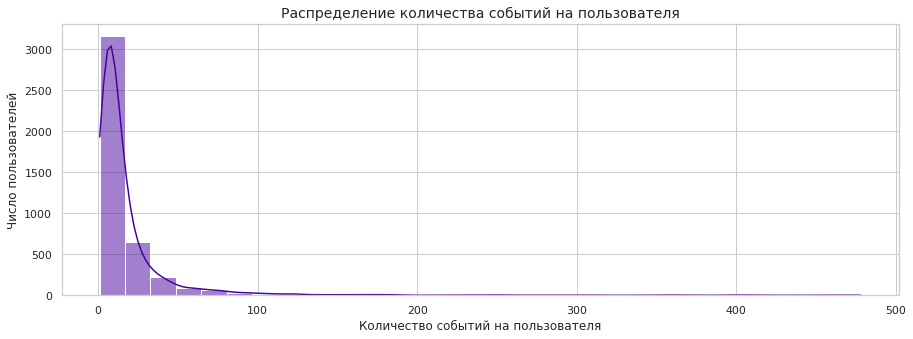

In [24]:
plt.figure(figsize=(15,5))

sns.set(style="whitegrid")

sns.histplot(data=events_by_user, x="num_of_events", kde=True, color = '#46039f', bins=30)

plt.title('Распределение количества событий на пользователя', fontsize=14)
plt.xlabel('Количество событий на пользователя', fontsize=12)
plt.ylabel('Число пользователей', fontsize=12);

Как мы видим, пользователи с более чем 100 событиями являются скорее исключением (выбросами). Такая высокая активность в приложении не является типичной для юзеров "Ненужных вещей".

Проверим с помощью других типов визуализации, действительно ли нам стоит рассматривать в качестве нетипичных именно пользователей с более чем 100 событиями (а не меньшим их количеством).  
Построим точечную диаграмму числа событий на одного пользователя.

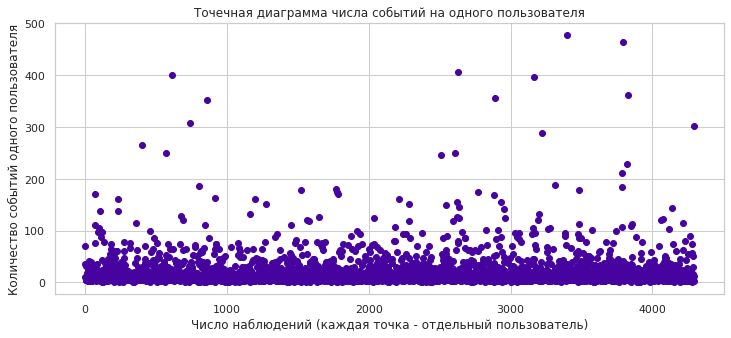

In [25]:
plt.figure(figsize=(12,5))

sns.set(style="whitegrid")

x_values = pd.Series(range(0,len(events_by_user)))
plt.scatter(x_values, events_by_user['num_of_events'], color = '#46039f') 

plt.ylabel('Количество событий одного пользователя')
plt.xlabel('Число наблюдений (каждая точка - отдельный пользователь)')

plt.title('Точечная диаграмма числа событий на одного пользователя');

Как мы видим, граница отсечения выбросов (пользователей с подозрительно высоким числом событий) может проходить и на уровне 70-80 событий.

Посчитаем, какой процент пользователей имеет более 100, более 80 и более 70 событий, чтоб точнее определить точку для отсечения аномальных данных. То есть, фактически, мы смотрим, какой процент пользователей мы отсечем, убрав пользователей с таким количеством событий.

In [26]:
# Задаем функцию, которая считает % пользователей с числом событий, большим, чем border_num_of_events

def share_users_with_big_num_of_events(border_num_of_events):
    return (round(events_by_user[events_by_user['num_of_events']> border_num_of_events]['user_id'].count() 
           / events_by_user['user_id'].nunique() * 100, 2))

In [27]:
share_users_with_big_num_of_events(70)

3.66

In [28]:
share_users_with_big_num_of_events(80)

2.63

In [29]:
share_users_with_big_num_of_events(100)

1.77

- Если мы уберем пользователей с более чем 70 событиями, мы потерям 3.7% данных по отдельным пользователям (не по событиям).
- Если мы уберем пользователей с более чем 80 событиями, мы потерям 2.6% данных по отдельным пользователям.
- Если мы уберем пользователей с более чем 100 событиями, мы потерям 1.8% данных по отдельным пользователям.


При очистке массива от выбросов принято отсеивать от 1% до 5% наблюдений с крайними значениями.  
В разрезе доли пользователей мы можем позволить себе убрать как пользователей с более чем 100 событиями, так и пользователей с более чем 70 событиями. Однако нам важно также учесть, какую долю сессий и событий мы уберем, удалив тот или иной процент крайне нетипичных пользователей.

Рассмотрим вопрос в разрезе событий.

In [30]:
# Задаем функцию, которая считает % событий от общего числа событий 
# для пользователей с числом событий, большим, чем border_num_of_events

def share_events_for_super_users(border_num_of_events):
    super_users_list = list(events_by_user.loc[events_by_user['num_of_events']> border_num_of_events]['user_id'])
    return (round(data[data['user_id'].isin(super_users_list)]['event_time'].count() 
                  / data['event_time'].count()*100,2))

In [31]:
share_events_for_super_users(70)

27.28

In [32]:
share_events_for_super_users(100)

18.27

Мы не можем удалить пользователей, для которых число событий начинается от 70 или от 100, т.к. тогда мы потеряем слишком большое число строк в исходном датафрейме (27.3% или 18.3% от общего числа событий соответственно).

Посмотрим распределение событий на пользователя еще раз.

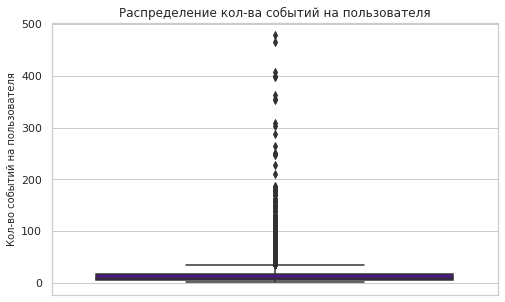

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(y='num_of_events', data=events_by_user, color = '#46039f')
plt.title('Распределение кол-ва событий на пользователя', fontsize=12)
plt.ylabel('Кол-во событий на пользователя', fontsize=10);

Как мы видим, значения выше 200 событий на пользователя являются единичными выбросами. Логично будет убрать как минимум эти значения.

Посмотрим, какую долю исходных данных мы потеряем, убрав эти выбросы.

In [34]:
share_users_with_big_num_of_events(200)

0.4

In [35]:
share_events_for_super_users(200)

7.5

Если мы уберем из анализа пользователей с более чем 200 событиями, мы потерям 0.4% данных по пользователям и 7.5% данных по событиям.   
Хотя доля данных в разрезе по событиям получается большей, чем 5%, будем считать это компромиссным вариантом, поскольку нам также необходимо обеспечить качество анализа в разрезе пользователей.

Отдельно отметим, почему мы вообще считаем необходимым удалить выбросы.  
Целью текущего исследования является выявление распространенных сценариев работы пользователей с приложением. То есть, мы хотим посмотреть, как ведет себя в приложении обычный, типичный пользователь. Поведение же пользователей с крайне большим количеством событий определенно нетипично. Однако в силу большого количества событий этих пользователей их сценарии поведения могут исказить общую картину распространенных сценариев работы пользователей с приложением.  

Интересно было бы отдельно исследовать поведение таких нетипичных "супер-пользователей" в приложении. Возможно, это люди, которые занимаются такого рода подработкой, как купля-перепродажа через сервис "Ненужные вещи": то есть, они не продают свои старые вещи, а выкупают и перепродают чужие. Может быть, они перепродают через сервис с наценкой что-то, заказанное с сайтов типа Алиэкспресс. В этом случае они могут пользоваться поиском и просмотром других объявлений, чтоб корректнее выставлять цены. Возможно, в случаях нетипично большого количества событий на пользователя имел место технический сбой, и некие события фиксировались повторно. В любом случае, такие "супер-пользователи" - это тема для отдельного исследования. А сейчас мы вернемся к исследованию типичных сценариев поведения большинства.

Удалим пользователей с более чем 200 событиями из основного массива, предварительно перезаписав данные по ним в отдельный массив, который можно будет исследовать при наличии времени.

In [36]:
super_users_list = list(events_by_user.loc[events_by_user['num_of_events']> 200]['user_id'])
super_users_data = data.loc[data['user_id'].isin(super_users_list)]
super_users_data.head()

,event_time,event_name,user_id,did_target_event,session_id,source
6724,2019-10-10 17:34:20.271085,map,1580911b-65db-4f1a-be7e-1ca39becac30,True,938,google
6725,2019-10-10 17:36:44.781908,search_3,1580911b-65db-4f1a-be7e-1ca39becac30,True,938,google
6726,2019-10-10 17:36:44.786769,search_3,1580911b-65db-4f1a-be7e-1ca39becac30,True,938,google
6727,2019-10-10 17:36:54.462767,advert_open,1580911b-65db-4f1a-be7e-1ca39becac30,True,938,google
6728,2019-10-10 17:37:06.568402,tips_show,1580911b-65db-4f1a-be7e-1ca39becac30,True,938,google


Мы успешно выделили операции супер-пользователей в отдельный массив, который может быть проанализирован отдельно.    
Теперь очистим основной рабочий массив от данных по "супер-пользователям".

In [37]:
data = data.query('user_id not in @super_users_list')

total_events = data.shape[0]
total_events

68630

В основном массиве осталось 68630 строк (событий) для анализа.

In [38]:
total_users = data['user_id'].nunique()
total_users

4276

Данные оставшегося массива относятся к 4276 пользователям.

Посмотрим на распределение событий на пользователя в оставшемся массиве.

In [39]:
events_by_user_upd = events_by_user.loc[events_by_user['num_of_events']<= 200]

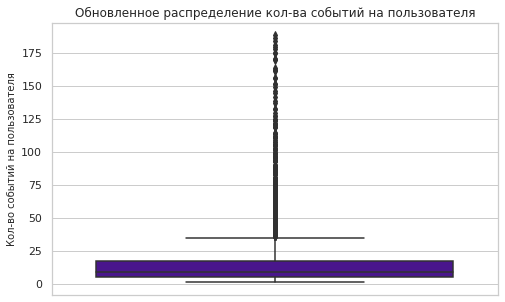

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(y='num_of_events', data=events_by_user_upd, color = '#46039f')
plt.title('Обновленное распределение кол-ва событий на пользователя', fontsize=12)
plt.ylabel('Кол-во событий на пользователя', fontsize=10);

Как мы видим, хвост выбросов в оставшемся массиве все еще достаточно длинный. Однако мы избавились от наиболее серьезных выбросов.

Теперь посмотрим на среднее и медианное значения количества событий на пользователя.

In [41]:
events_by_user_upd.describe()

,num_of_events
count,4276.000000
mean,16.050047
std,21.030823
min,1.000000
25%,5.000000
50%,9.000000
75%,17.000000
max,188.000000


- Среднее количество событий на пользователя равно 16. Однако, учитывая, что в данных все еще достаточно много выбросов, для оценки лучше использовать медиану, значение которой равно 9 событиям на пользователя. Медианное значение означает, что 50% пользователей совершают в приложении 9 событий и меньше. 
- При этом 25% пользователей совершили только от 1 до 5 событий в анализируемом периоде.
- 75% пользователей совершили до 17 событий в анализируемом периоде, т.е. практически за месяц (28 дней).

Таким образом, активность большинства пользователей в приложении "Ненужные вещи" достаточно низка.  
Product Manager, задумавшийся над повышением вовлеченности, действительно имеет для этого все основания.

Однако отдельно тут стоит отметить, что пользователи "Ненужных вещей" могут быть не совсем однородны в своих поведенческих паттернах.   
Так, есть некая прослойка пользователей, совершающих крайне много действий в приложении. Часть из них (0.4%) мы удалили при очистке массива ранее. Часть из них попала в четвертый квартиль. Если большое количество событий по таким пользователям не обусловлено технической ошибкой, интересно было бы собрать больше информации о подобных высокоактивных пользователях, возможно - даже посмотреть на записи их сеансов и разобраться, что именно они делают в приложении и чем может быть обусловлена их высокая вовлеченность. При необходимости нескольких таких пользователей можно было бы пригласить на JTBD-интервью и узнать у них особенности использования ими приложения.  
Вероятно, это помогло бы команде донести ту ценность, которую в продукте видят высокооактивные пользователи, до всех остальных. Либо команда могла бы изменить концепцию позиционирования и продвижения продукта таким образом, чтоб привлекать больше пользователей, которые в дальнейшем становятся высокооактивными. Однако это тема для отдельного исследования.

Теперь изучим, как меняется пользовательская активность в разрезе доступных нам параметров пользовательской аудитории, а именно:
- в разрезе каналов их привлечения,
- в разрезе того, совершали ли они целевое событие.

Посмотрим, есть ли различия в количестве событий на пользователя для пользователей, пришедших из разных каналов. 

In [42]:
events_by_user_with_source_data = data.groupby(['user_id', 'source', 'did_target_event'], as_index=False).agg({'event_time': 'nunique'})
events_by_user_with_source_data.columns = ['user_id', 'source', 'did_target_event', 'num_of_events']

events_by_user_with_source_data.sort_values(by='num_of_events', ascending=False).head(10)

,user_id,source,did_target_event,num_of_events
3299,c68bdd6d-bad7-4f51-8113-302f2364387c,yandex,False,188
796,2ce6c413-30d2-4d26-8b83-0bd21bc66546,yandex,False,186
3771,e0a19ff5-468c-4c47-8dc4-bc4eb9854a96,yandex,False,184
1767,6a14b2fe-5aa5-496f-a5d0-71d7870ff91b,other,False,181
3468,cfd9b735-0bc2-448d-8d54-0019db8748a3,yandex,True,179
1520,5bffcd16-5312-4137-8dd6-e87c9c40c7e9,other,True,178
2761,a5886b3e-6ed1-4c47-ac28-754ff8f429ce,yandex,True,175
1768,6a1f495c-f6dc-475d-a286-ed802d6627be,other,False,175
70,04d0b1b4-d31f-4c19-bc7e-14e5fcf6f791,yandex,False,170
1781,6b1c96da-ab05-4140-880b-c5a5410fd4c2,yandex,False,170


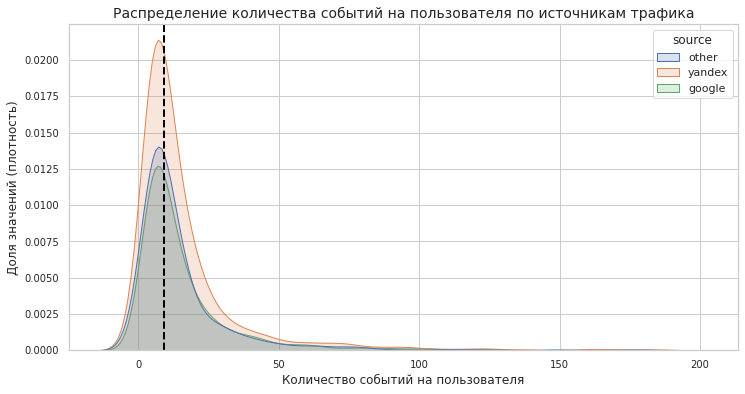

In [43]:
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")

sns.kdeplot(data=events_by_user_with_source_data, x='num_of_events', hue = 'source', fill=True, alpha=0.2)

plt.title('Распределение количества событий на пользователя по источникам трафика', fontsize=14)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Количество событий на пользователя', fontsize=12)
plt.ylabel('Доля значений (плотность)', fontsize=12)

# Добавим на график медианное значение количества событий на пользователя по всему датасету.
xmedian = np.median(events_by_user_with_source_data['num_of_events'])
plt.axvline(xmedian, c='black', linewidth = 2, linestyle = '--');

В целом, распределения для разных источников трафика достаточно похожи. Нельзя сказать, что пользователи, пришедшие из одного из источников, гораздо более активны в приложении, чем другие.

Посмотрим конкретные статистики.

In [44]:
events_by_user_with_source_data.groupby('source').describe().reset_index()

source num_of_events                                                  
                  count       mean        std  min  25%  50%   75%    max
0  google        1121.0  15.943800  18.854553  1.0  5.0  9.0  18.0  151.0
1   other        1228.0  15.447883  20.816301  1.0  5.0  9.0  16.0  181.0
2  yandex        1927.0  16.495589  22.327424  1.0  5.0  9.0  18.0  188.0

Действительно, показатели первого и второго квартилей совсем не различаются. Медиана для каждого из источников равна 9 событиям на пользователя.

Теперь посмотрим, есть ли различия в количестве событий на пользователя в группах совершавших и не совершавших целевое действие - просмотр контактов.

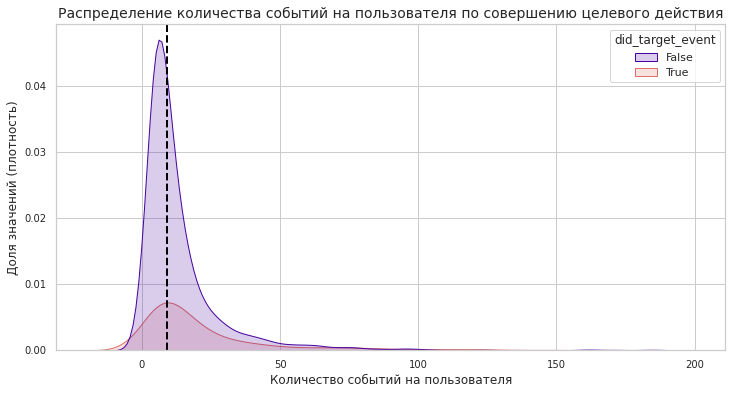

In [45]:
plt.figure(figsize=(12,6))
sns.set(style="whitegrid")

sns.kdeplot(data=events_by_user_with_source_data, x='num_of_events', hue = 'did_target_event', fill=True, alpha=0.2, palette=['#46039f', '#de7065ff'])

plt.title('Распределение количества событий на пользователя по совершению целевого действия', fontsize=14)

plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Количество событий на пользователя', fontsize=12)
plt.ylabel('Доля значений (плотность)', fontsize=12)

# Добавим на график медианное значение количества событий на пользователя по всему датасету.
xmedian = np.median(events_by_user_with_source_data['num_of_events'])
plt.axvline(xmedian, c='black', linewidth = 2, linestyle = '--');

Кажется, что количество событий на пользователя больше для той группы пользователей, которые совершали целевое действие.  
Посмотрим конкретные статистики.

In [46]:
events_by_user_upd.groupby('did_target_event').describe().reset_index()

did_target_event num_of_events                                              \
                           count       mean        std  min  25%   50%   75%   
0            False        3310.0  14.000906  18.048598  1.0  5.0   8.0  15.0   
1             True         966.0  23.071429  27.903945  1.0  7.0  13.0  26.0   

          
     max  
0  188.0  
1  179.0

Медианное значение количества событий на пользователя выше в той группе пользователей, которые совершали целевое событие - просматривали контакты. Для этой группы медиана равна 13 событиям.  
Для группы пользователей, не просматривавших контакты, медиана равна 8 событиям.

Еще больше разница между границами 3 квартиля:
- В группе совершавших целевое событие граница 3 квартиля равна 26 событиям: то есть, 75% пользователей из группы совершали 26 событий или менее.
- В группе не совершавших целевое событие граница 3 квартиля равна 15 событиям, что сопоставимо с показателями второго квартиля для группы совершавших целевое событие.

####  Количество и доля событий различных типов

Посмотрим, какие типы пользовательских событий преобладали в исследуемом периоде. 

In [47]:
event_types = data['event_name'].value_counts().sort_values(ascending=False).reset_index()
event_types.columns = ['event_name', 'num_of_events']
event_types['share']= round(event_types['num_of_events'] / total_events * 100, 1)

event_types

,event_name,num_of_events,share
0,tips_show,36606,53.3
1,photos_show,9835,14.3
2,advert_open,5655,8.2
3,contacts_show,3797,5.5
4,search_1,3475,5.1
5,map,3458,5.0
6,favorites_add,1323,1.9
7,search_5,1023,1.5
8,tips_click,763,1.1
9,search_4,692,1.0


Визуализируем наши расчеты.

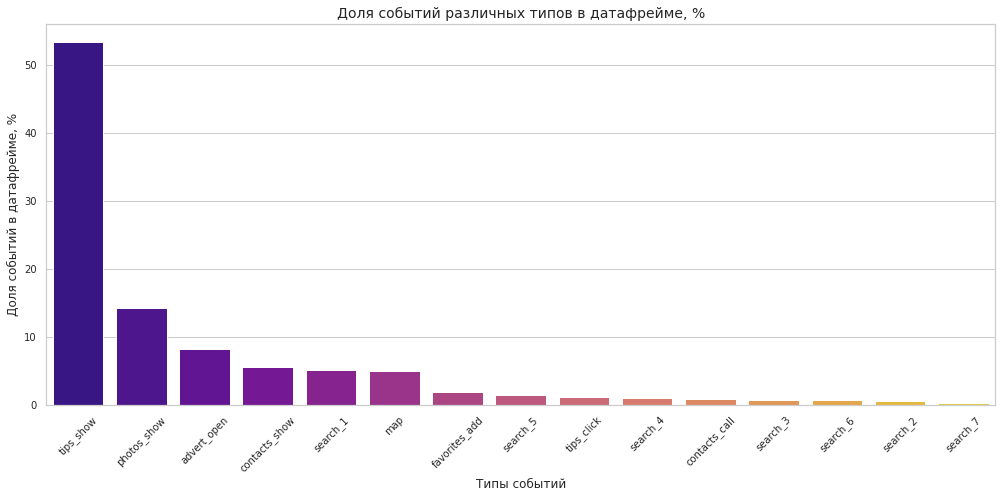

In [48]:
plt.figure(figsize=(17,7))

sns.set(style="whitegrid")

sns.barplot(x='event_name', y='share', data=event_types, palette='plasma')
plt.title('Доля событий различных типов в датафрейме, %', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Типы событий', fontsize=12)
plt.ylabel('Доля событий в датафрейме, %', fontsize=12);

53.3% событий в датафрейме - события типа tips_show, означающие, что пользователь увидел рекомендованные объявления.  
Доля других типов событий значительно меньше.

Важно отметить, что события tips_show не являются в полной мере пользовательскими событиями. Точнее - не являются результатом пользовательской активности, пользовательскими действиями. 
Показ рекомендованных объявлений происходит автоматически и не зависит от самого пользователя. 

Что касается именно пользовательских событий (пользовательских действий), наибольшую долю событий составляют просмотры фото (photos_show) - 14.3%. Далее следуют такие события, как открытие объявлений (advert_open) - 8.2%, показ контактов - 5.5%, search_1 - 5.1% и просмотр карты объявлений (map) - 5.0 %.

Доля остальных событий от общего числа событий в датафрейме не превышает 5%.

Важно помнить, что мы не можем делать какие-либо заключения на основе количества событий, т.к. один и тот же пользователь может несколько раз совершать одни и те же действия даже в рамках одного сеанса.

Поэтому перейдем на уровень анализа отдельных пользователей.

#### Сколько пользователей совершали каждое из событий

Посмотрим, сколько пользователей совершали каждое из событий.

In [49]:
events_by_users = pd.pivot_table(data, index = 'event_name', values = 'user_id', aggfunc='nunique').sort_values(by='user_id', ascending = False).reset_index()
events_by_users.columns = ['event', 'num_of_users']
events_by_users['share_of_users'] = round(events_by_users['num_of_users'] / data['user_id'].nunique()*100, 1)
events_by_users

,event,num_of_users,share_of_users
0,tips_show,2784,65.1
1,map,1441,33.7
2,photos_show,1094,25.6
3,contacts_show,966,22.6
4,search_1,786,18.4
5,advert_open,739,17.3
6,search_5,656,15.3
7,search_4,470,11.0
8,favorites_add,345,8.1
9,search_6,327,7.6


Визуализируем расчеты.

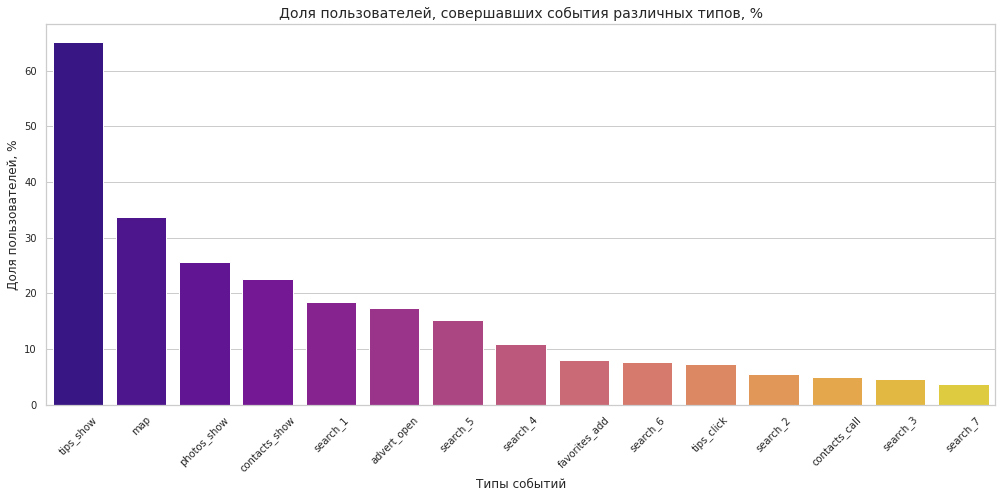

In [50]:
plt.figure(figsize=(17,7))

sns.set(style="whitegrid")

sns.barplot(x='event', y='share_of_users', data=events_by_users, palette='plasma')
plt.title('Доля пользователей, совершавших события различных типов, %', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Типы событий', fontsize=12)
plt.ylabel('Доля пользователей, %', fontsize=12);

Какие интересные особенности мы видим на графике выше:

- Рекомендованные объявления показывались 65.1% пользователей. Однако кликали на них только 7.3% пользователей. Ниже рассчитаем, какова конверсия из показов рекомендованных объявлений в клики по ним. Эта информация важна, поскольку рекомендованные объявления являются основным каналом монетизации приложения.


- Открывали карту объявлений 33.7% пользователей.


- Просмотрели фотографии в объявлении 25.6% пользователей; просмотрели номер телефона - 22.6% пользователей. При этом открыли карточки объявления только 17.3% пользователей. Значит, просмотр номера телефона и фотографий в объявлении возможен без открытия карточек объявления (возможно, по прямой ссылке на них или каким-то иным образом, например - через функционал карты). Таким образом, логически ожидаемая часть пользовательской воронки - 'advert_open -> contacts_show' становится только одним из возможных вариантов. Либо - как альтернатива - для рекомендованных объявлений событие открытия карточки фиксируется не как advert_open, а только как tips_click - по клику на карточку. Тогда просмотреть номер телефона действительно можно только из объявления (в сумме advert_open + tips_click дают 24.6% пользователей (верхняя граница возможного показателя)), но попасть в объявление можно через 2 различных события. При этом просмотр фото в объявлении все еще остается возможным без входа в само объявление.


- Только 5% пользователей звонили по номеру из объявления прямо в приложении. Однако мы не можем достоверно сказать, сколько пользователей могли звонить по контактам, просто набирая номер с мобильного. Именно поэтому данная метрика не может использоваться как целевая для дальнейшего анализа.


- Разные типы поиска использовали различные доли пользователей: наиболее популярны поиски 1, 5 и 4. Их использовали 18.4%, 15.3% и 11.0% пользователей соответственно. Мало используются поиски 3 и 7 - их использовали 4.7% и 3.7% пользователей соответственно. 


- Только 8.1% пользователей использовали функционал добавления в избранное. Видимо, этот функционал не вяляется достаточно популярным.

#### Какие события влияют на конверсию в целевое действие

Проанализируем, какие события влияют на конверсию в целевое действие.

Для этого разделим пользователей на 2 группы - тех, кто совершал и кто не совершал целевое действие (просмотр контактов) - и проанализируем структуру событий для каждой из этих 2 групп.

Для начала выделим 2 группы.

In [51]:
df1 = data.query('did_target_event == True')
df2 = data.query('did_target_event == False')

Для группы 1 рассчитаем, сколько пользователей совершали каждое из событий.

In [52]:
df1_events_by_users = (pd.pivot_table(df1, index = 'event_name', values = 'user_id', aggfunc='nunique')
                       .sort_values(by='user_id', ascending = False).reset_index())

df1_events_by_users.columns = ['event', 'num_of_users']
df1_events_by_users['share_of_users'] = round(df1_events_by_users['num_of_users'] / df1['user_id'].nunique()*100, 1)
df1_events_by_users.head(5)

,event,num_of_users,share_of_users
0,contacts_show,966,100.0
1,tips_show,501,51.9
2,photos_show,338,35.0
3,map,276,28.6
4,search_1,236,24.4


Для группы 2 рассчитаем, сколько пользователей совершали каждое из событий.

In [53]:
df2_events_by_users = (pd.pivot_table(df2, index = 'event_name', values = 'user_id', aggfunc='nunique')
                       .sort_values(by='user_id', ascending = False).reset_index())

df2_events_by_users.columns = ['event', 'num_of_users']
df2_events_by_users['share_of_users'] = round(df2_events_by_users['num_of_users'] / df2['user_id'].nunique()*100, 1)
df2_events_by_users.head(5)

,event,num_of_users,share_of_users
0,tips_show,2283,69.0
1,map,1165,35.2
2,photos_show,756,22.8
3,advert_open,611,18.5
4,search_1,550,16.6


Объединим полученные таблицы в одну для удобства дальнейшей визуализации.

In [54]:
df3_events_by_users = pd.concat([df1_events_by_users, df2_events_by_users], axis=0, ignore_index=False)
df3_events_by_users['group'] = (len(df1_events_by_users)*('Просмотрели контакты',) + len(df2_events_by_users)*('Не смотрели контакты',))
df3_events_by_users.reset_index(inplace=True)

df3_events_by_users.head(5)
#df3_events_by_users.tail(5)

,index,event,num_of_users,share_of_users,group
0,0,contacts_show,966,100.0,Просмотрели контакты
1,1,tips_show,501,51.9,Просмотрели контакты
2,2,photos_show,338,35.0,Просмотрели контакты
3,3,map,276,28.6,Просмотрели контакты
4,4,search_1,236,24.4,Просмотрели контакты


На основании полученных данных построим диаграмму, отражающую долю пользователей, которые совершали те или иные события в каждой из 2 подгрупп.

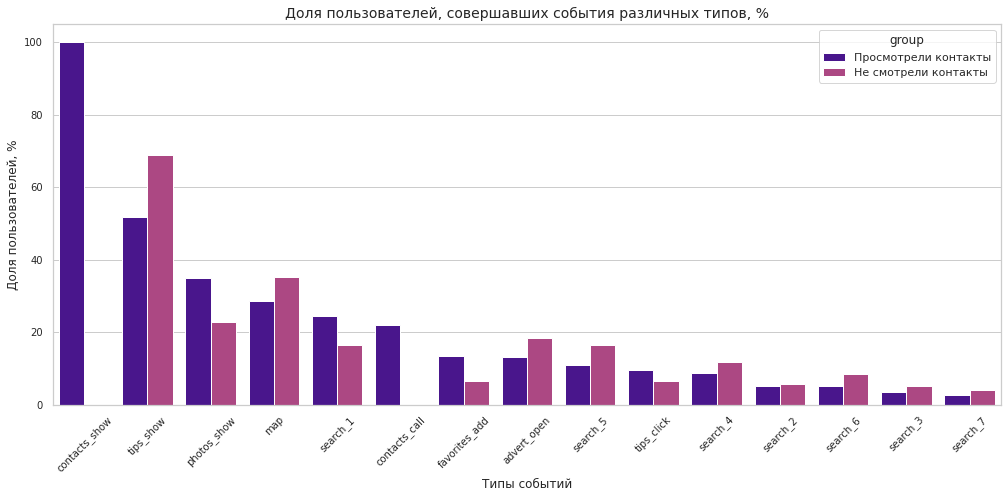

In [55]:
plt.figure(figsize=(17,7))

sns.set(style="whitegrid")

sns.barplot(data=df3_events_by_users, x="event", y='share_of_users', hue="group", palette = ['#46039f', "#bd3786"])

plt.title('Доля пользователей, совершавших события различных типов, %', fontsize=14)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Типы событий', fontsize=12)
plt.ylabel('Доля пользователей, %', fontsize=12);

Как мы видим, на пользователей, которые выполняли целевое событие, приходится 14 категорий событий, а на пользователей, которые не выполняли, только 12. Все логично: у пользователей, не выполнявших целевое событие, не может быть категорий contacts_show и contacts_call. Значит, данные были обработаны корректно.

Какие различия мы видим с точки зрения структуры событий для групп пользователей, просматривавших и не просматривавших контакты:

1) Пользователи, выполнившие целевое событие - просматривавшие контакты - чаще совершали события:
- photos_show,
- search1,
- favorites_add,
- tips_click.

2) Пользователи, не просматривавшие контакты, чаще совершали события:
- tips_show (большей доле из них показывались рекомендованные объявления),
- map,
- advert_open,
- search 5, 4, 6, 3, 7.

Search_2 обе группы выполняли примерно в одинаковой доле, с небольшим превышением % выполнявших среди группы пользователей, не совершивших целевое событие.

Соответственно, мы можем предположить, что photos_show, search1, favorites_add и tips_click могут оказывать положительное влияние на конверсию в просмотр контактов. Мы проверим это предположение на этапе проверки гипотез.

Напротив, map, advert_open и search 5, 4, 6, 3, 7 могут оказывать негативное влияние на конверсию в просмотр контактов. То есть, если пользователь переходит на сценарии, где возможны эти события, его что-то может отвлекать, или он не находит там нужной информации, и т.д.  
То же самое касается и tips_show. Возможно, показ рекомендуемых объявлений, если рекомендательная система настроена плохо и они подобраны не очень удачно, только отвлекает пользователей от того, что они изначально искали, и поэтому пользователи не доходят до целевого действия.

#### Паттерны поведения пользователей и возможные сценарии использования приложения

На этапе предобработки данных для каждого из пользователей мы выделили сессии.   
Посмотрим, какие события входят в структуру сессий, и какие последовательности событий в сессиях являются типичными. На основании этого мы сможем сделать выводы об основных сценариях использования приложения. 

Первым шагом определим последовательности уникальных событий в рамках каждой из сессий.

In [56]:
event_flows_df = data.groupby('session_id', as_index=False).agg(event_flow =('event_name', 'unique'))
event_flows_df.head()

,session_id,event_flow
0,1,[tips_show]
1,2,"[map, tips_show]"
2,3,"[tips_show, map]"
3,4,"[map, tips_show]"
4,5,"[search_1, photos_show]"


Мы успешно создали наборы уникальных событий для каждой сессии.

Посмотрим, сколько уникальных сочетаний потоков событий имеется, и какие из них являются наиболее частыми.


In [57]:
event_flows_df['event_flow'] = event_flows_df['event_flow'].astype('string')
event_flows_num = event_flows_df.groupby('event_flow').agg('count').reset_index().sort_values(by='session_id', ascending=False)
event_flows_num.columns = ['event_flow', 'num_of_cases']
event_flows_num['share'] = round(event_flows_num['num_of_cases'] / event_flows_df['event_flow'].count()*100,1)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 120)
event_flows_num

,event_flow,num_of_cases,share
666,['tips_show'],2485,25.2
225,['photos_show'],1316,13.3
264,['search_1'],598,6.1
192,['map' 'tips_show'],531,5.4
261,['search_1' 'photos_show'],516,5.2
589,['tips_show' 'contacts_show'],268,2.7
627,['tips_show' 'map'],191,1.9
91,['contacts_show'],190,1.9
134,['map' 'advert_open' 'tips_show'],169,1.7
665,['tips_show' 'tips_click'],161,1.6


В 25.2% сессий единственным типом событий был показ рекомендованных объявлений.   
Также в ряде случаев tips_show был первым событием в последовательности. Например:

        - ['tips_show' 'contacts_show'] -	2.7% сессий,
        - ['tips_show' 'map'] 	-	1.9%,
        - ['tips_show' 'tips_click'] -	1.6%,
        - ['tips_show' 'advert_open'] - 0.5%,
        - ['tips_show' 'map' 'advert_open'] - 0.4%,
        - ['tips_show' 'favorites_add'] - 0.3%,
        - ['tips_show' 'contacts_show' 'map'] -	0.2%,
        - ['tips_show' 'contacts_show' 'tips_click'] - 0.1%,
        - ['tips_show' 'tips_click' 'contacts_show'] -	0.1 %.

Здесь возможны 2 логических заключения:
- Возможно, в приложении реализован функционал просмотра контактов без обязательного открытия объявления, в том числе и рекомендованного. 
- Если первое утверждение неверно, тогда вопрос во времени тайм-аута для разбивки потока событий на сессии. В черновых вариантах исследования в качестве времени тайм-аута были рассмотрены временные промежутки в 10, 20, 30, 40, 60 минут. Однако ни один из этих промежутков существенно не сократил долю спорных сочетаний событий, как, например, ['tips_show', 'contacts_show']. Поэтому для удобства всех последующих аналитических операций с данными по проекту "Ненужные вещи" я бы порекомендовала продуктовой команде в явном виде ввести в перечень событий событие "new_session_start", которое обозначало бы, что предыдущий пользовательский сеанс был автоматически завершен по истечению времени тайм-аута, и пользователь начинает новый сеанс с главного экрана приложения, а не с той точки, в котрой он остановился в прошлый раз.
- Также возникает вопрос, что является главным (стартовым) экраном приложения, с которого начинается любая пользовательская сессия после тайм-аута. Если исходить из доли в 25.2% сеансов, для которых характерен только просмотр рекомендованных объявлений, мы можем предположить, что главным экраном приложения является экран с рекомендованными объявлениями, как, например, это реализовано в приложении Авито. Если пользователь Авито начинает новый сеанс после тайм-аута, он видит страницу с рекомендованными объявлениями и поисковой строкой в верхней ее части.
- Если рекомендованные объявления действительно могут появляться как часть главной страницы, с которой начинаются сессии, и в каких-то других локациях посреди, а не в начале пользовательских сеансов, я бы порекомендовала команде в явном виде ввести в перечень событий 2 различных события - "tips_show_main" и "tips_show_flow", чтоб мы могли понимать, в каком моменте пользовательских сессий происходит конкретное взаимодействие с рекомендованными объявлениями.


Перейдем к следующему распространенному типу событий.

В 13.3% сессий единственным типом событий был просмотр фотографий.   
Также есть ряд последовательностей, которые начинаются с просмотра фотографий:

       - ['photos_show' 'search_1'] 	-	1.1% сессий,
       - ['photos_show' 'contacts_show'] -	0.9 %,
       - ['photos_show' 'favorites_add'] -	0.5 %,
       - ['photos_show' 'contacts_show' 'contacts_call'] -	0.4%.


Это выглядит несколько странно: если человек не взаимодействовал с картой, поиском и не открывал объявления, каким образом он мог попадать на фотографии - большой вопрос.   
В качестве гипотезы можно предположить, что:  
- пользователи в таких случаях заходили в приложение для просмотра фото по прямой ссылке, которую им скидывал кто-то из близких;   
- время тайм-аута в приложении, после которого сбрасывается последний просмотренный пользователем экран и открывается стартовый экран, является большим, чем те промежутки, которые мы проверяли как период для разграничения сессий. 
Сделать ситуацию более ясной, как мы упомянули выше, могло бы введение в перечень событий в явном виде события "new_session_start", которое обозначало бы, что предыдущий пользовательский сеанс был автоматически завершен по истечению времени тайм-аута, и пользователь начинает новый сеанс. В этом случае, если бы после "new_session_start" шло событие просмотра фото, мы могли бы быть уверены, что в этом сеансе пользователь перешел в приложение именно по прямой ссылке на фото.

Перейдем к следующему распростаненному типу событий и связанным с ним сценариям.

В 6.1% сессий единственным событием был 'search_1'.   
Также есть сессии, в которых начальным событием был 'search_1':

        - ['search_1' 'photos_show'] - 5.2 % сессий,
        - ['search_1' 'contacts_show' 'contacts_call'] 	- 0.5 %,
        - ['search_1' 'photos_show' 'contacts_show'] 	- 0.5%,
        - ['search_1' 'favorites_add'] 	- 	0.4 %,
        - ['search_1' 'contacts_show'] 	- 	0.4 %,
        - ['search_1' 'photos_show' 'favorites_add'] -	0.4 %,
        - ['search_1' 'photos_show' 'contacts_show' 'con... - 0.1%.
        
Это один из возможных достаточно логичных сценариев пользовательского поведения:

- Пользователи начинают сеанс с поиска чего-то конкретного в поисковой строке (предположим, что 'search_1' - это поисковая строка главного экрана; об этом чуть ниже).  
- Далее в найденных объявлениях они могут пролистать фото, не заходя в сами объявления. Поскольку сочетаний событий ['search_1', 'photos_show'] у нас достаточно много, вероятно, такой функционал реализован в приложении. 
- Однако они также могут сразу просмотреть контакты или добавить объявление в избранное, также не заходя в него.

Таким образом, одним из возможных начальных узлов в сеансах является 'search_1'. Далее существуют как минимум 3 ветки развития событий.

Интересно отметить, что 'search_1' практически никогда не встречается в сочетании с другими типами 'search', тогда как они, наоборот, часто встречаются вместе. Вернемся к этому вопросу ниже.

Проанализируем следующий распростаненный тип событий и связанные с ним сценарии.

В 5.4% сессий было 2 события - просмотр карты объявлений и последующий показ рекомендуемых объявлений: ['map', 'tips_show'].   
Также в 1.3% сессий было только 1 событие - ['map'].  
Кроме того, были и другие сессии, начинавшиеся с просмотра карты объявлений:

        - ['map' 'tips_show' 'contacts_show'] - 	0.8% сессий,
        - ['map' 'tips_show' 'advert_open'] - 	0.4%,
        - ['map' 'advert_open'] - 	0.3%,
        - ['map' 'search_3' 'advert_open' 'tips_show'] 	-	0.3%,
        - ['map' 'tips_show' 'tips_click'] 	- 	0.3%,
        - ['map' 'contacts_show' 'tips_show'] 	-	0.2%,
        - ['map' 'advert_open' 'tips_show' 'search_3'] 	-	0.1%,
        - ['map' 'contacts_show'] 	- 	0.1%,
        - ['map' 'search_3']	-	0.1%,
        - ['map' 'advert_open' 'tips_show' 'contacts_show']	-	0.1%.
        
Один из возможных сценариев использования приложения - начало сеансов с просмотра карты объявлений.   
Т.е., вероятно, есть пользователи, которых в рамках опеределенных сеансов по каким-то причинам интересуют только объявления рядом с ними или объявления в определенной локации. Может быть, это связано с весом товаров, которые они ищут, или с особенностями их транспортировки.

После события map часто следует tips_show (показ рекомендованных объявлений), тогда как после search_1 в наиболее частотных сценариях tips_show не встречается.

Также (если мы исключим tips_show как системное, а не пользовательское действие) часто после map следуют contacts_show (значит, возможно просмотреть контакты с карты, не заходя в объявление), advert_open и search_3.  

Для сценариев с search_1 advert_open практически не встречалось. Это выглядит достаточно логично: в предпросмотре результатов поиска пользователь, очевидно, может видеть какую-то необходимую ему информацию, а в просмотре карты объявлений он этой информации лишен, и ему приходится заходить в сами объявления.

Теперь перейдем к следующему интересному кластеру событий.  

В нижней части полученного нами датафрейма есть большое количество событий, включающих поиски 2, 4, 5, 6 в различных комбинациях, например:

        - ['search_4' 'search_6' 'search_5' 'tips_show'] - 	0.7% сессий,
    	- ['search_6' 'search_5' 'tips_show'] 	- 	0.6 %,
    	- ['search_4' 'search_5' 'tips_show'] 	- 	0.6%,
        - ['search_4' 'search_6' 'search_2' 'search_5' '... 	-	0.5 %,
        - ['search_4' 'search_2' 'search_5' 'tips_show'] - 0.2%,
        - ['search_4' 'search_5' 'map' 'tips_show'] - 0.2%,
        - ['search_2' 'search_5'] - 0.2%,
        - ['search_4' 'search_5'] - 0.2%,
        - ['search_4' 'search_2' 'search_5' 'map' 'tips_... - 0.1%,
        - ['search_6' 'search_5'] - 0.1%,
        - ['search_4' 'search_6' 'search_5'] - 0.1%,
        - ['search_6' 'search_2' 'search_5' 'tips_show'] - 0.1%,
        - и т.д. 

Интересно, что они очень часто встречаются вместе (хотя иногда могут встречаться и по-отдельности).   
Исходя из этого, а также из того, что search_1 никогда не встречается с ними в последовательных цепочках действий, мы можем предполагать, что search_1 - это поиск через поисковую строку без настройки фильтров, а search_2,4,5,6 - это поиск с донастройкой фильтров. Каждый из активированных фильтров при этом отображается как отдельное событие.   

В идеале, в условиях реального проекта, эту информацию продуктовая команда должна была бы предоставить изначально (либо мы могли бы получить ее из документации разработчиков, устанавливавших трекеры и делавших разметку событий).

Однако, чтоб таких непонятных ситуаций, как вопрос, к чему относятся те или иные виды категории search, в принципе не возникало, мы могли бы порекомендовать продуктовой команде "Ненужных вещей" переименовать события search_1 - search_7 в разметке в более понятные категории, например, в зависимости от того, к какой локации в приложении относится поиск, или от того, применение каких фильтров он описывает. Так, наверняка, search_1 = search_no_filters, то есть поиск через ввод текста в поисковую строку без фиксации дополнительных фильтров поиска. Search 2, 4, 5, 6 крайне вероятно могут оказаться фильтрами по категории товаров, локации, цене товара и т.д. Нужно было бы явным образом отразить это в названии событий, например, как: search_filter_price, search_filter_location и т.д.

Проанализируем поиски search_2, 4, 5, 6 как единый тип событий.

Создадим дополнительный столбец, где search_2, 4, 5, 6 будут сгруппированы в единую категорию filtered_search_2_4_5_6.   
Мы не включаем в эту категорию search_1, т.к. он никогда не встречается с первыми 4-мя в одной последовательности, а также search_3 и search_7, т.к., кажется, они также чаще встречаются отдельно.

In [58]:
data['new_event_cats'] = data['event_name']
data['new_event_cats'].replace(['search_2', 'search_4', 'search_5', 'search_6'], 'filtered_search_2_4_5_6',inplace=True)
data.head(5)

,event_time,event_name,user_id,did_target_event,session_id,source,new_event_cats
0,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1,other,tips_show
1,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1,other,tips_show
2,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1,other,tips_show
3,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1,other,tips_show
4,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,1,other,tips_show


Посмотрим, сколько уникальных сочетаний потоков событий, включающих  единую категорию filtered_search_2_4_5_6, имеется, и какие из них являются наиболее частыми.

In [59]:
event_flows_df_upd = data.groupby('session_id', as_index=False).agg(event_flow =('new_event_cats', 'unique'))
event_flows_df_upd.head()

,session_id,event_flow
0,1,[tips_show]
1,2,"[map, tips_show]"
2,3,"[tips_show, map]"
3,4,"[map, tips_show]"
4,5,"[search_1, photos_show]"


In [60]:
event_flows_df_upd['event_flow'] = event_flows_df_upd['event_flow'].astype('string')
event_flows_num = event_flows_df_upd.groupby('event_flow').agg('count').reset_index().sort_values(by='session_id', ascending=False)
event_flows_num.columns = ['event_flow', 'num_of_cases']
event_flows_num['share'] = round(event_flows_num['num_of_cases'] / event_flows_df_upd['event_flow'].count()*100,1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 120)
event_flows_num

,event_flow,num_of_cases,share
455,['tips_show'],2485,25.2
277,['photos_show'],1316,13.3
316,['search_1'],598,6.1
244,['map' 'tips_show'],531,5.4
315,['search_1' 'photos_show'],516,5.2
172,['filtered_search_2_4_5_6' 'tips_show'],341,3.5
397,['tips_show' 'contacts_show'],268,2.7
437,['tips_show' 'map'],191,1.9
83,['contacts_show'],190,1.9
191,['map' 'advert_open' 'tips_show'],169,1.7


Теперь мы видим, что 3.5% сессий содержали совокупное событие ['filtered_search_2_4_5_6', 'tips_show'] - то есть, поиск с одним или несколькими фильтрами 2, 4, 5, 6 и следующий за ним показ рекомендованных объявлений.

Также достаточно распространенными были следующие последовательности событий в сессиях, начинающихся с поиска с одним или несколькими фильтрами 2, 4, 5, 6:

        - ['filtered_search_2_4_5_6'] - 1.0% сессий,
    	- ['filtered_search_2_4_5_6' 'map' 'tips_show'] - 0.9%,
        - ['filtered_search_2_4_5_6' 'map'] - 0.4%,
        - ['filtered_search_2_4_5_6' 'tips_show' 'map'] - 0.4 %,
        - ['filtered_search_2_4_5_6' 'map' 'advert_open' 'tips_show'] - 0.4%,
        - ['filtered_search_2_4_5_6' 'tips_show' 'contacts_show'] - 0.3%,
        - ['filtered_search_2_4_5_6' 'map' 'advert_open' 'tips_show' 'search_3'] -	0.1%,
        - ['filtered_search_2_4_5_6' 'contacts_show' 'tips_show'] -	0.1%,
        - ['filtered_search_2_4_5_6' 'contacts_show'] - 0.1%,
        - ['filtered_search_2_4_5_6' 'map' 'search_3' 'advert_open' 'tips_show'] - 0.1%,
        - ['filtered_search_2_4_5_6' 'tips_show' 'tips_click'] - 0.1%,
        - ['filtered_search_2_4_5_6' 'map' 'tips_show' 'advert_open'] - 0.1%,
        - ['filtered_search_2_4_5_6' 'map' 'advert_open' 'tips_show' 'search_7'] - 0.1%,
        - ['filtered_search_2_4_5_6' 'map' 'tips_show' 'contacts_show'] - 4 сессии,
        - ['filtered_search_2_4_5_6' 'map' 'advert_open' 'tips_show' 'contacts_show'] -	4 сессии, и т.д.

Таким образом, еще один вероятный сценарий взаимодействия пользователей с приложением "Ненужные вещи" - это начало сеанса с поиска с применением фильтров. 
Часто за ним следует просмотр карты, а за просмотром карты - открытие объявлений.

Подведем итог анализа паттернов поведения пользователей в приложении "Ненужные вещи":

- В приложении нет одого-двух четко структурированных единообразных сценариев, по которым пользователь мог бы приходить к целевому событию - просмотру контактов, поскольку нет событий (действий), обязательных для выполнения перед переходом к целевому событию. Как мы видим выше, не обязательно даже открывать объявление, чтоб посмотреть контакты. Просмотр контактов мог быть совершен практически с любого шага - после использования поиска без фильтров, после использования поиска с фильтрами, поиска по карте, просмотра рекомендованных объявлений или просмотра фото.


- Однако, несмотря на отсутствие одной-двух четко структурированных от и до воронок конверсии, можно выделить несколько моделей типичного поведения пользователей. Это:
 
   - Мини-воронка ['search_1', 'photos_show', 'contacts_show'].
   - Мини-воронка ['map', 'advert_open', 'tips_show', 'contacts_show'].
   - Мини-воронка ['filtered_search_2_4_5_6', 'map', 'advert_open', 'contacts_show'].


- Интересно отметить следующий факт. В предыдущем разделе, посвященном анализу влияния различных событий на конверсию мы выяснили, что пользователи, выполнившие целевое событие - просматривавшие контакты - чаще совершали события: photos_show, search_1, favorites_add, tips_click, что больше соответствует первой из перечисленных выше моделей поведения пользователей. Напротив, пользователи, не просматривавшие контакты, чаще совершали события: tips_show (большей доле из них показывались рекомендованные объявления), map, advert_open, search 5, 4, 6, 3, 7, что больше соответствует 2 и 3 моделям поведения пользователей. Таким образом, на данном этапе у нас есть гипотеза, какие из распространенных паттернов поведения пользователей являются более и менее успешными с точки зрения конверсии в целевое действие. Далее мы изучим это предположение более подробно.


- Также стоит отметить, что команде "Ненужных вещей" стоило бы проработать разметку событий в приложении. В частности, имеет смысл добавить явным образом заданные: 
    - событие "new_session_start", которое обозначало бы, что предыдущий пользовательский сеанс был автоматически завершен по истечению времени тайм-аута, и пользователь начинает новый сеанс с главного экрана приложения, а не с той точки, в котрой он остановился в прошлый раз;
    -  2 различных события - "tips_show_main" и "tips_show_flow", чтоб мы могли понимать, в каком моменте пользовательских сессий происходит конкретное взаимодействие с рекомендованными объявлениями - на главном экране или нет;
    - переименовать события search_1 - search_7 в разметке в более понятные категории, например, в зависимости от того, к какой локации в приложении относится поиск, или от того, применение каких фильтров он описывает. Так, наверняка, search_1 = search_no_filters, то есть поиск через ввод текста в поисковую строку без фиксации дополнительных фильтров поиска. Search 2, 4, 5, 6 крайне вероятно могут оказаться фильтрами по категории товаров, локации, цене товара и т.д. Нужно было бы явным образом отразить это в названии событий, например, как: search_filter_price, search_filter_location и т.д.

####  Расчет воронки 1: Исходное событие воронки - поиск с настройкой фильтров

Построим продуктовую воронку, содержащую события  ['filtered_search_2_4_5_6', 'map', 'advert_open', 'contacts_show'], и проанализируем, сколько пользователей доходят до каждого ее этапа. 

Конверсию для каждого этапа будем рассчитывать от числа пользователей на предыдущем шаге. 

In [133]:
# Воронка для сценария 'filtered_search_2_4_5_6'  -> 'map'  -> 'advert_open'  -> 'contacts_show'
 
# Отбираем пользователей, которые совершили события search_2,4,5,6.

funnel_events = ['filtered_search_2_4_5_6', 'map', 'advert_open', 'contacts_show']

filtered_search_users_id = data.loc[data['new_event_cats'] == funnel_events[0]]['user_id'].unique()
filtered_search_users_num = len(filtered_search_users_id)

# Из тех, кто совершал события search_2,4,5,6, отбираем пользователей, которые просматривали карту объявлений (map).

map_users_id = data.query('user_id in @filtered_search_users_id & event_name == @funnel_events[1]')['user_id'].unique()
map_users_num = len(map_users_id)

# Из тех, кто совершал события search_2,4,5,6 и просматривал карту,
# отбираем пользователей, которые открывали объявления.

advert_open_users_id = data.query('user_id in @map_users_id & event_name == @funnel_events[2]')['user_id'].unique()
advert_open_users_num = len(advert_open_users_id)

# Из тех, кто совершал события search_2,4,5,6, просматривал карту, открывал объявления
# отбираем пользователей, которые просматривали контакты.

contacts_show_users_id = data.query('user_id in @advert_open_users_id & event_name == @funnel_events[3]')['user_id'].unique()
contacts_show_users_num = len(contacts_show_users_id)


# Задаем переменные с количеством событий.
funnel_count = [filtered_search_users_num, map_users_num, advert_open_users_num, contacts_show_users_num]
                
# Строим диаграмму воронки.
 
fig = go.Figure(go.Funnel(
    y = funnel_events,
    x = funnel_count,
    textinfo = "value+percent initial + percent previous"))
    #marker = {"color": ['#46039f', '#46039f', '#46039f', '#46039f', '#46039f']}))

#fig.update_layout(title="Пользовательская воронка со стартовым событием filtered_search_2_4_5_6", template="simple_white")

fig.show();

# Ниже превратим этот частный случай в функцию для воронок с любым числом событий.
# На данном этапе было важно детально разобраться в шагах построения воронки.

В воронке ['filtered_search_2_4_5_6', 'map', 'advert_open', 'contacts_show'] только 4% от пользователей, начавших воронку, доходят до целевого действия - просмотра контактов.

Из поиска с фильтрами в просмотр карты конвертируются 47% пользователей, из просмотра карты к открытию объявления приходят 40% пользователей. Наиболее низкая конверсия наблюдается из открытия объявлений в просмотр контактов - 23% пользователей от предыдущего шага. Вероятно, в объявлениях пользователи не находят той информации, которая им необходима или товар при ближайшем рассмотрении не соответствует их запросам.

####  Функция для расчета и построения воронок конверсии

Поскольку нам нужно будет построить несколько воронок, зададим соответствующую функцию.

In [62]:
def funnel_func(df, events_list):
    
    data = df
    funnel_events = events_list
    
    funnel_count = []
    filter_ids = []
    
    for i in range(len(funnel_events)):
        
        funnel_events_value = funnel_events[i]
        
        if i == 0:
            user_id_list = data.query('new_event_cats == @funnel_events_value')['user_id'].unique()
        else:
            filter_id = filter_ids[i-1]
            user_id_list = data.query('new_event_cats == @funnel_events_value & user_id in @filter_id')['user_id'].unique()
        
        funnel_count.append(len(user_id_list))
        filter_ids.append(user_id_list)
        
    # Строим диаграмму воронки.
 
    fig = go.Figure(go.Funnel(
        y = funnel_events,
        x = funnel_count,
        textinfo = "value+percent initial + percent previous"))
        
    fig.show()

Проверим, совпадут ли результаты функции, если применить ее к воронке, посчитанной вручную на предыдущем шаге.

In [135]:
funnel_func(data, ['filtered_search_2_4_5_6', 'map', 'advert_open', 'contacts_show'])

Результаты применения функции верны - теперь мы можем использовать ее для расчета любых других воронок в данном проекте.

####  Расчет воронки 2: Исходное событие воронки - поиск без фильтров

Построим продуктовую воронку, содержащую события ['search_1', 'photos_show', 'contacts_show'], и проанализируем, сколько пользователей доходят до каждого ее этапа. 

In [145]:
funnel_func(data, ['search_1', 'photos_show', 'contacts_show'])

В воронке ['search_1', 'photos_show', 'contacts_show'] 24% от пользователей, начавших воронку, доходят до целевого действия - просмотра контактов.

Из поиска без фильтров в просмотр фото конвертируются 82% пользователей, что является очень хорошим показателем.   
Из тех, кто просмотрел фото, 30% конвертируются в просмотр контактов.

####  Расчет воронки 3: Исходное событие воронки - просмотр карты

Построим продуктовую воронку, содержащую события ['map' 'advert_open' 'contacts_show'], и проанализируем, сколько пользователей доходят до каждого ее этапа. 

In [139]:
funnel_func(data, ['map', 'advert_open', 'contacts_show'])

В воронке ['map' 'advert_open' 'contacts_show'] только 5% от пользователей, начавших воронку, доходят до целевого действия - просмотра контактов.
Из просмотра карты объявлений в открытие объявлений конвертируются 35% пользователей.  
Из тех, кто просмотрел объявления, в просмотр контактов конвертируются 15% пользователей.

Эта воронка, за исключением начального шага, во многом совпадает с первой из построенных воронок - ['filtered_search_2_4_5_6', 'map', 'advert_open', 'contacts_show']. Их показатели сопоставимы. В первой до целевого действия доходят 4% пользователей, начавших воронку. При этом, конверсия из map в advert_open несколько выше (40%), а из advert_open в показ контактов равнозначна (15%).

Определенно, первая и третья из рассмотренных воронок менее эффективны с точки зрения конверсии пользователей в целевое действие, чем вторая, которая не предполагает просмотра карты.

####  Расчет воронки 4: Исходное событие воронки - показ рекомендованных объявлений

Как мы знаем, монетизация приложения не зависит от факта продажи товара напрямую. 
Монетизация осуществляется за счет продаж премиум-подписки и платного продвижения объявлений в рекомендациях и поисковых запросах.  

Чтоб продавцы использовали платный функционал, они должны видеть отдачу как минимум в росте количества просмотров объявлений. А значит, рекомендательная система должна работать максимально эффективно.

Рассмотрим, какова конверсия из показа объявлений (tips_show) в клики по ним (tips_click) и в дальнейший показ контактов.  То есть, оценим конверсию для воронки ['tips_show', 'tips_click', 'contacts_show'].

Это поможет понять, насколько релевантные объявления подбирает рекомендательная система внутри приложения.

In [144]:
funnel_func(data, ['tips_show', 'tips_click', 'contacts_show'])

Общая конверсия воронки ['tips_show', 'tips_click', 'contacts_show'] составляет только 3%.   
При этом конверсия из показов рекомендованных объявлений в клики составляет 10%, а из кликов по рекомендованным объявлениям в просмотр контактов - 29%.  

Необходимо поработать над рекомендательной системой в приложении и сделать ее более эффективной. В целом пользователи готовы связываться с продавцами из рекомендованных объявлений, узкое место представляет собой именно этап клика по объявлению, а значит - степень релевантности рекомендаций предыдущим запросам пользователя или его соц-дем профилю.

#### Как различается время между распространенными событиями пользователей

Возьмем достаточно распространенную пару событий: ['search_1', 'photos_show']. Эта пара событий, как мы выяснили ранее, встречается как минимум в 6.2% сессий:

  - ['search_1' 'photos_show'] - 5.2 %
  - ['search_1' 'photos_show' 'contacts_show']     - 0.5%
  - ['search_1' 'photos_show' 'favorites_add'] -    0.4 %
  - ['search_1' 'photos_show' 'contacts_show' 'con... - 0.1%
  
Первым шагом отберем те сессии, где эти 2 события встречались вместе.

Когда мы анализировали паттерны поведения пользователей, мы создали датафрейм event_flows_df, содержащий id каждой сессии и перечень событий в ней. Напомним, как он выглядит.

In [67]:
event_flows_df.head()

,session_id,event_flow
0,1,['tips_show']
1,2,['map' 'tips_show']
2,3,['tips_show' 'map']
3,4,['map' 'tips_show']
4,5,['search_1' 'photos_show']


С помощью регулярных выражений отберем из этой таблицы те из строк, где встречаются одновременно события 'search_1' и 'photos_show'.

In [68]:
search1_and_photos_sessions = (event_flows_df[event_flows_df['event_flow'].str.contains('search_1', regex= True) 
                                              & event_flows_df['event_flow'].str.contains('photos_show', regex= True)])

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', 120)
search1_and_photos_sessions.head(5)

,session_id,event_flow
4,5,['search_1' 'photos_show']
5,6,['search_1' 'photos_show' 'favorites_add' 'contacts_show' 'contacts_call']
7,8,['search_1' 'photos_show' 'contacts_show' 'contacts_call' 'favorites_add' 'advert_open']
8,9,['search_1' 'photos_show' 'contacts_show']
28,29,['search_1' 'photos_show']


Номера сессий, где встечаются оба события - 'search_1' и 'photos_show' - успешно отобраны.  
Отберем соответсвующие строки из основного датафрейма.

In [69]:
search1_photos_sessions_list = list(search1_and_photos_sessions['session_id'])
search1_photos_sessions_df = data[data['session_id'].apply(lambda x: x in search1_photos_sessions_list)]

# Из этих сессий отберем только строки, где события - это search_1 и photos_show.

search_photo_events = ['search_1', 'photos_show']
search1_photos_sessions_df = search1_photos_sessions_df.query('event_name in @search_photo_events')
                                  
search1_photos_sessions_df.head(10)

,event_time,event_name,user_id,did_target_event,session_id,source,new_event_cats
35,2019-10-19 21:34:33.849769,search_1,00157779-810c-4498-9e05-a1e9e3cedf93,True,5,yandex,search_1
36,2019-10-19 21:35:19.296599,search_1,00157779-810c-4498-9e05-a1e9e3cedf93,True,5,yandex,search_1
37,2019-10-19 21:36:44.344691,search_1,00157779-810c-4498-9e05-a1e9e3cedf93,True,5,yandex,search_1
38,2019-10-19 21:40:38.990477,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,True,5,yandex,photos_show
39,2019-10-19 21:42:13.837523,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,True,5,yandex,photos_show
40,2019-10-19 21:44:55.589731,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,True,5,yandex,photos_show
41,2019-10-19 21:46:52.541309,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,True,5,yandex,photos_show
42,2019-10-19 21:58:00.109019,search_1,00157779-810c-4498-9e05-a1e9e3cedf93,True,5,yandex,search_1
43,2019-10-19 21:59:54.637098,photos_show,00157779-810c-4498-9e05-a1e9e3cedf93,True,5,yandex,photos_show
44,2019-10-20 18:49:24.115634,search_1,00157779-810c-4498-9e05-a1e9e3cedf93,True,6,yandex,search_1


Рассчитаем время между этими 2 событиями в рамках каждой из сессий, а затем найдем среднее значение по всем сессиям.  

Поскольку события могли повторяться несколько раз в рамках сессии, нам нужно найти разницу между первыми событиями каждого из типов, т.е. первой строкой, где встечается search_1, и первой строкой, где встречается photos_show.

Первым шагом найдем минимальное время событий в каждой сессии.

In [70]:
search1_photos_sessions_df = (search1_photos_sessions_df.groupby(['session_id', 'event_name', 'did_target_event'])
                              .agg({'event_time':'min'})).reset_index()
search1_photos_sessions_df = search1_photos_sessions_df.sort_values(by=['session_id', 'event_time'])
search1_photos_sessions_df.head(10)

,session_id,event_name,did_target_event,event_time
1,5,search_1,True,2019-10-19 21:34:33.849769
0,5,photos_show,True,2019-10-19 21:40:38.990477
3,6,search_1,True,2019-10-20 18:49:24.115634
2,6,photos_show,True,2019-10-20 18:59:22.541082
5,8,search_1,True,2019-10-29 21:18:24.850073
4,8,photos_show,True,2019-10-29 21:19:35.389792
7,9,search_1,True,2019-10-30 07:50:45.948358
6,9,photos_show,True,2019-10-30 07:53:12.730053
9,29,search_1,True,2019-10-23 08:53:33.363215
8,29,photos_show,True,2019-10-23 08:57:25.136704


Посчитаем дельту между ними.

In [71]:
search1_photos_time_delta = search1_photos_sessions_df.groupby('session_id')['event_time'].diff()
search1_photos_time_delta.head(5)

1                      NaT
0   0 days 00:06:05.140708
3                      NaT
2   0 days 00:09:58.425448
5                      NaT
Name: event_time, dtype: timedelta64[ns]

Посчитаем среднюю разницу во времени между событиями.

In [72]:
search1_photos_time_delta.mean()

Timedelta('0 days 00:06:34.560187637')

Средняя разница во времени между событиями search_1 и photos_show составляет 6 минут 34 секунды.  
Посмотрим, как этот показатель отличается между 2 группами пользователей - совершившими и не совершившими целевое действие.

In [73]:
true = True
search1_photos_sessions_df_converted = search1_photos_sessions_df.query('did_target_event ==@true')
search1_photos_sessions_df_not_converted = search1_photos_sessions_df.query('did_target_event !=@true')

search1_photos_converted_time_delta = search1_photos_sessions_df_converted.groupby('session_id')['event_time'].diff()
search1_photos_converted_time_delta.mean()

Timedelta('0 days 00:07:55.350664206')

В группе совершивших целевое действие разница во времени между событиями search_1 и photos_show составляет 7 минут 55 секунд.

In [74]:
search1_photos_not_converted_time_delta = search1_photos_sessions_df_not_converted.groupby('session_id')['event_time'].diff()
search1_photos_not_converted_time_delta.mean()

Timedelta('0 days 00:05:51.316098913')

В группе не совершивших целевое действие разница во времени между событиями search_1 и photos_show составляет 5 минут 51 секунду.

Соответственно, те, кто в итоге совершает целевое действие, вероятно, дольше и внимательнее просматривают результаты выдачи после поиска, прежде чем перейти к просмотру конкретных фото.

####  Вывод

В ходе исследовательского анализа данных:

1) <b>Определен период времени, к которому относятся данные в датафрейме</b>. Это период с 7 октября по 3 ноября 2019 года включительно. То есть, срез данных включает практически месяц (28 дней).

2) <b>Проанализировано количество событий на пользователя. Из анализа удалены пользователи с крайне нетипично высоким количеством событий (более 200)</b>.

В ходе анализа мы выяснили, что пользователи с более чем 100 событиями являются скорее исключением (выбросами). Такая высокая активность в приложении не является типичной для юзеров "Ненужных вещей". Более того, даже пользователи с 70-80 событиями достаточно редки. Однако если удалить из анализа всех пользователей, для которых число событий начинается от 70 или от 100, мы потеряем слишком большое число строк (событий), доступных для анализа - 27.3% или 18.3% соответственно.

Значения выше 200 событий на пользователя являются единичными выбросами. Всего в датафрейме 17 таких пользователей. Их поведение с точки зрения количества событий серьезно отличается даже от основной массы других нетипичных пользователей. Логично убрать как минимум эти наблюдения. Убрав их, мы терям 0.4% данных по пользователям и 7.5% данных по событиям. Хотя это больше 5%, которые обычно являются максимальной границей при очистке массива, будем считать это компромиссным вариантом, поскольку нам также необходимо обеспечить качество анализа в разрезе пользователей.

 - После удаления из массива супер-пользователей в нем осталось 68630 строк (событий) для анализа. Данные оставшегося массива относятся к 4276 пользователям.


- Отдельно отметим, почему мы сочли необходимым удалить выбросы.  
  Целью текущего исследования является выявление распространенных сценариев работы пользователей с приложением. То есть, мы хотим посмотреть, как ведет себя в приложении обычный, типичный пользователь. Поведение же пользователей с крайне большим количеством событий определенно нетипично. Однако в силу большого количества событий этих пользователей их сценарии поведения могут исказить общую картину распространенных сценариев работы пользователей с приложением. 
  
  
- Интересно было бы отдельно исследовать поведение таких нетипичных "супер-пользователей" в приложении. Возможно, это люди, которые занимаются такого рода подработкой, как купля-перепродажа через сервис "Ненужные вещи": то есть, они не продают свои старые вещи, а выкупают и перепродают чужие. Может быть, они перепродают через сервис с наценкой что-то, заказанное с сайтов типа Алиэкспресс. В этом случае они могут пользоваться поиском и просмотром других объявлений, чтоб корректнее выставлять цены. Возможно, в случаях нетипично большого количества событий на пользователя имел место технический сбой, и некие события фиксировались повторно. В любом случае, такие "супер-пользователи" - это тема для отдельного исследования.

3) <b>После очистки массива от выбросов среднее количество событий на пользователя равно 16. Однако, учитывая, что в данных все еще достаточно много выбросов, для оценки лучше использовать медиану, значение которой равно 9 событиям на пользователя</b>. 

- Медианное значение означает, что 50% пользователей совершают в приложении 9 событий и меньше.
- При этом 25% пользователей совершили только от 1 до 5 событий.
- 75% пользователей совершили до 17 событий.

Таким образом, активность большинства пользователей в приложении "Ненужные вещи" достаточно низка. Product Manager, задумавшийся над повышением вовлеченности, действительно имеет для этого все основания.

Однако отдельно тут стоит отметить, что пользователи "Ненужных вещей" могут быть не совсем однородны в своих поведенческих паттернах.
Так, есть некая прослойка пользователей, совершающих крайне много действий в приложении. Часть из них (0.4%) мы удалили при очистке массива ранее. Часть из них попала в четвертый квартиль. Если большое количество событий по таким пользователям не обусловлено технической ошибкой, интересно было бы собрать больше информации о подобных высокоактивных пользователях, возможно - даже посмотреть на записи их сеансов и разобраться, что именно они делают в приложении и чем может быть обусловлена их высокая вовлеченность. При необходимости нескольких таких пользователей можно было бы пригласить на JTBD-интервью и узнать у них особенности использования ими приложения.  
Вероятно, это помогло бы команде донести ту ценность, которую в продукте видят высокооактивные пользователи, до всех остальных. Либо команда могла бы изменить концепцию позиционирования и продвижения продукта таким образом, чтоб привлекать больше пользователей, которые в дальнейшем становятся высокооактивными. Однако это тема для отдельного исследования.

4) <b>Рассмотрено, как меняется пользовательская активность в разрезе доступных нам параметров пользовательской аудитории</b>:

- Различий в количестве событий на пользователя в разрезе каналов привлечения нет. Медиана для каждого из источников равна 9 событиям на пользователя.

- Различия в количестве событий на пользователя в группах совершавших и не совершавших целевое действие - просмотр контактов – существуют. Медианное значение количества событий на пользователя выше в группе пользователей, которые совершали целевое событие - просматривали контакты. Для этой группы медиана равна 13 событиям, а для группы не просматривавших контакты -  8 событиям.


5) <b>Проанализировано, какие типы событий преобладали в исследуемом периоде</b>.

- 53.3% событий в датафрейме - события типа tips_show, означающие, что пользователь увидел рекомендованные объявления.  События tips_show не являются в полной мере пользовательскими событиями, поскольку показ рекомендованных объявлений происходит автоматически и не зависит от самого пользователя. 

Что касается именно пользовательских событий (пользовательских действий):
- Наибольшую долю событий составляют просмотры фото (photos_show) - 14.3%. 
- Далее следуют такие события, как открытие объявлений (advert_open) - 8.2%, показ контактов - 5.5%, search_1 - 5.1% и просмотр карты объявлений (map) - 5.0 %.
- Доля остальных событий не превышает 5% от общего числа событий в датафрейме.


6) <b>Проанализировано, сколько пользователей совершали каждое из событий</b>.

- Рекомендованные объявления показывались 65.1% пользователей. Однако кликали на них только 7.3% пользователей. 
- Открывали карту объявлений 33.7% пользователей. 

- Просмотрели фотографии в объявлении 25.6% пользователей; просмотрели номер телефона - 22.6% пользователей. При этом открыли карточки объявления только 17.3% пользователей. Значит, просмотр номера телефона и фотографий в объявлении возможен без открытия карточек объявления (возможно, по прямой ссылке на них или каким-то иным образом, например - через функционал карты). Таким образом, логически ожидаемая часть пользовательской воронки - 'advert_open -> contacts_show' становится только одним из возможных вариантов. Либо - как альтернатива - для рекомендованных объявлений событие открытия карточки фиксируется не как advert_open, а только как tips_click - по клику на карточку. Тогда просмотреть номер телефона действительно можно только из объявления (в сумме advert_open + tips_click дают 24.6% пользователей (верхняя граница возможного показателя)), но попасть в объявление можно через 2 различных события. При этом просмотр фото в объявлении все еще остается возможным без входа в само объявление. 

- Только 5% пользователей звонили по номеру из объявления прямо в приложении. Однако мы не можем достоверно сказать, сколько пользователей могли звонить по контактам, просто набирая номер с мобильного. Именно поэтому данная метрика не может использоваться как целевая для дальнейшего анализа. 

- Разные типы поиска использовали различные доли пользователей: наиболее популярны поиски 1, 5 и 4. Их использовали 18.4%, 15.3% и 11.0% пользователей соответственно. Мало используются поиски 3 и 7 - их использовали 4.7% и 3.7% пользователей соответственно. 

- Только 8.1% пользователей использовали функционал добавления в избранное. Видимо, этот функционал не вяляется достаточно популярным. 

7) <b>Проанализировано, какие события влияют на конверсию в целевое действие</b>.

Для этого мы разделили пользователей на 2 группы - тех, кто совершал и кто не совершал целевое действие (просмотр контактов) - и проанализировали структуру событий для каждой из этих 2 групп (посмотрели, сколько пользователей совершали каждое из событий).

- Пользователи, выполнившие целевое событие - просматривавшие контакты - чаще совершали события photos_show, search1, favorites_add, tips_click. 
- Пользователи, не просматривавшие контакты, чаще совершали события: tips_show (большей доле из них показывались рекомендованные объявления), map, advert_open, search 5, 4, 6, 3, 7. 
- Search_2 обе группы выполняли примерно в одинаковой доле, с небольшим превышением % выполнявших среди группы пользователей, не совершивших целевое событие.

Мы можем предположить, что photos_show, search1, favorites_add и tips_click могут оказывать положительное влияние на конверсию в просмотр контактов. Мы проверим это предположение на этапе проверки гипотез.  
Напротив, map, advert_open и search 5, 4, 6, 3, 7 могут оказывать негативное влияние на конверсию в просмотр контактов. То есть, если пользователь переходит на сценарии, где возможны эти события, его что-то может отвлекать, или он не находит там нужной информации, и т.д.  
То же самое касается и tips_show. Возможно, показ рекомендуемых объявлений, если рекомендательная система настроена плохо и они подобраны не очень удачно, только отвлекает пользователей от того, что они изначально искали, и поэтому пользователи не доходят до целевого действия.

8) <b>Были проанализированы основные паттерны пользовательского поведения в рамках сессий</b>.

В 25.2% сессий единственным типом событий был показ рекомендованных объявлений.
Также в ряде случаев tips_show был первым событием в последовательности. Например:

    - ['tips_show' 'contacts_show'] -    2.7% сессий,
    - ['tips_show' 'map']     -    1.9%,
    - ['tips_show' 'tips_click'] -    1.6%,
    - ['tips_show' 'advert_open'] - 0.5%,
    - ['tips_show' 'map' 'advert_open'] - 0.4%,
    - ['tips_show' 'favorites_add'] - 0.3%,
    - ['tips_show' 'contacts_show' 'map'] -    0.2%,
    - ['tips_show' 'contacts_show' 'tips_click'] - 0.1%,
    - ['tips_show' 'tips_click' 'contacts_show'] -    0.1 %.
    
Здесь возможны 2 логических заключения:

- Возможно, в приложении реализован функционал просмотра контактов без обязательного открытия объявления, в том числе и рекомендованного. 
- Если первое утверждение неверно, тогда вопрос во времени тайм-аута для разбивки потока событий на сессии. В черновых вариантах исследования в качестве времени тайм-аута были рассмотрены временные промежутки в 10, 20, 30, 40, 60 минут. Однако ни один из этих промежутков существенно не сократил долю спорных сочетаний событий, как, например, ['tips_show', 'contacts_show']. Поэтому для удобства всех последующих аналитических операций с данными по проекту "Ненужные вещи" я бы порекомендовала продуктовой команде в явном виде ввести в перечень событий событие "new_session_start", которое обозначало бы, что предыдущий пользовательский сеанс был автоматически завершен по истечению времени тайм-аута, и пользователь начинает новый сеанс с главного экрана приложения, а не с той точки, в котрой он остановился в прошлый раз. 
- Также возникает вопрос, что является главным (стартовым) экраном приложения, с которого начинается любая пользовательская сессия после тайм-аута. Если исходить из доли в 25.2% сеансов, для которых характерен только просмотр рекомендованных объявлений, мы можем предположить, что главным экраном приложения является экран с рекомендованными объявлениями, как, например, это реализовано в приложении Авито. Если пользователь Авито начинает новый сеанс после тайм-аута, он видит страницу с рекомендованными объявлениями и поисковой строкой в верхней ее части. 
- Если рекомендованные объявления действительно могут появляться как часть главной страницы, с которой начинаются сессии, и в каких-то других локациях посреди, а не в начале пользовательских сеансов, я бы порекомендовала команде в явном виде ввести в перечень событий 2 различных события - "tips_show_main" и "tips_show_flow", чтоб мы могли понимать, в каком моменте пользовательских сессий происходит конкретное взаимодействие с рекомендованными объявлениями. 

Перейдем к следующему распространенному типу событий.

В 13.3% сессий единственным типом событий был просмотр фотографий.
Также есть ряд последовательностей, которые начинаются с просмотра фотографий:

    - ['photos_show' 'search_1']     -    1.1% сессий,
    - ['photos_show' 'contacts_show'] -    0.9 %,
    - ['photos_show' 'favorites_add'] -    0.5 %,
    - ['photos_show' 'contacts_show' 'contacts_call'] -    0.4%.
   
Это выглядит несколько странно: если человек не взаимодействовал с картой, поиском и не открывал объявления, каким образом он мог попадать на фотографии - большой вопрос.

В качестве гипотезы можно предположить, что: 
- пользователи в таких случаях заходили в приложение для просмотра фото по прямой ссылке, которую им скидывал кто-то из близких; 
- время тайм-аута в приложении, после которого сбрасывается последний просмотренный пользователем экран и открывается стартовый экран, является большим, чем те промежутки, которые мы проверяли как период для разграничения сессий. Сделать ситуацию более ясной, как мы упомянули выше, могло бы введение в перечень событий в явном виде события "new_session_start", которое обозначало бы, что предыдущий пользовательский сеанс был автоматически завершен по истечению времени тайм-аута, и пользователь начинает новый сеанс. В этом случае, если бы после "new_session_start" шло событие просмотра фото, мы могли бы быть уверены, что в этом сеансе пользователь перешел в приложение именно по прямой ссылке на фото. 

Перейдем к следующему распростаненному типу событий и связанным с ним сценариям.

В 6.1% сессий единственным событием был 'search_1'.
Также есть сессии, в которых начальным событием был 'search_1':

    - ['search_1' 'photos_show'] - 5.2 % сессий,
    - ['search_1' 'contacts_show' 'contacts_call']     - 0.5 %,
    - ['search_1' 'photos_show' 'contacts_show']     - 0.5%,
    - ['search_1' 'favorites_add']     -     0.4 %,
    - ['search_1' 'contacts_show']     -     0.4 %,
    - ['search_1' 'photos_show' 'favorites_add'] -    0.4 %,
    - ['search_1' 'photos_show' 'contacts_show' 'con... - 0.1%.
    
Это один из возможных достаточно логичных сценариев пользовательского поведения:

- Пользователи начинают сеанс с поиска чего-то конкретного в поисковой строке (предположим, что 'search_1' - это поисковая строка главного экрана; об этом чуть ниже). 
- Далее в найденных объявлениях они могут пролистать фото, не заходя в сами объявления. Поскольку сочетаний событий ['search_1', 'photos_show'] у нас достаточно много, вероятно, такой функционал реализован в приложении. 
- Однако они также могут сразу просмотреть контакты или добавить объявление в избранное, также не заходя в него. 

Таким образом, одним из возможных начальных узлов в сеансах является 'search_1'. Далее существуют как минимум 3 ветки развития событий.

Интересно отметить, что 'search_1' практически никогда не встречается в сочетании с другими типами 'search', тогда как они, наоборот, часто встречаются вместе. Вернемся к этому вопросу ниже.

Проанализируем следующий распростаненный тип событий и связанные с ним сценарии.

В 5.4% сессий было 2 события - просмотр карты объявлений и последующий показ рекомендуемых объявлений: ['map', 'tips_show']. Также в 1.3% сессий было только 1 событие - ['map'].
Кроме того, были и другие сессии, начинавшиеся с просмотра карты объявлений:

    - ['map' 'tips_show' 'contacts_show'] -     0.8% сессий,
    - ['map' 'tips_show' 'advert_open'] -     0.4%,
    - ['map' 'advert_open'] -     0.3%,
    - ['map' 'search_3' 'advert_open' 'tips_show']     -    0.3%,
    - ['map' 'tips_show' 'tips_click']     -     0.3%,
    - ['map' 'contacts_show' 'tips_show']     -    0.2%,
    - ['map' 'advert_open' 'tips_show' 'search_3']     -    0.1%,
    - ['map' 'contacts_show']     -     0.1%,
    - ['map' 'search_3']    -    0.1%,
    - ['map' 'advert_open' 'tips_show' 'contacts_show']    -    0.1%.
    
Один из возможных сценариев использования приложения - начало сеансов с просмотра карты объявлений.

Т.е., вероятно, есть пользователи, которых в рамках опеределенных сеансов по каким-то причинам интересуют только объявления рядом с ними или объявления в определенной локации. Может быть, это связано с весом товаров, которые они ищут, или с особенностями их транспортировки.

После события map часто следует tips_show (показ рекомендованных объявлений), тогда как после search_1 в наиболее частотных сценариях tips_show не встречается.

Также (если мы исключим tips_show как системное, а не пользовательское действие) часто после map следуют contacts_show (значит, возможно просмотреть контакты с карты, не заходя в объявление), advert_open и search_3.  

Для сценариев с search_1 advert_open практически не встречалось. Это выглядит достаточно логично: в предпросмотре результатов поиска пользователь, очевидно, может видеть какую-то необходимую ему информацию, а в просмотре карты объявлений он этой информации лишен, и ему приходится заходить в сами объявления.

Теперь перейдем к следующему интересному кластеру событий. 

В нижней части полученного нами датафрейма есть большое количество событий, включающих поиски 2, 4, 5, 6 в различных комбинациях, например:

    - ['search_4' 'search_6' 'search_5' 'tips_show'] -     0.7% сессий,
    - ['search_6' 'search_5' 'tips_show']     -     0.6 %,
    - ['search_4' 'search_5' 'tips_show']     -     0.6%,
    - ['search_4' 'search_6' 'search_2' 'search_5' '...     -    0.5 %,
    - ['search_4' 'search_2' 'search_5' 'tips_show'] - 0.2%,
    - ['search_4' 'search_5' 'map' 'tips_show'] - 0.2%,
    - ['search_2' 'search_5'] - 0.2%,
    - ['search_4' 'search_5'] - 0.2%,
    - ['search_4' 'search_2' 'search_5' 'map' 'tips_... - 0.1%,
    - ['search_6' 'search_5'] - 0.1%,
    - ['search_4' 'search_6' 'search_5'] - 0.1%,
    - ['search_6' 'search_2' 'search_5' 'tips_show'] - 0.1%,
    - и т.д. 
    
Интересно, что они очень часто встречаются вместе (хотя иногда могут встречаться и по-отдельности).  
Исходя из этого, а также из того, что search_1 никогда не встречается с ними в последовательных цепочках действий, мы можем предполагать, что search_1 - это поиск через поисковую строку без настройки фильтров, а search_2,4,5,6 - это поиск с донастройкой фильтров. Каждый из активированных фильтров при этом отображается как отдельное событие. 

В условиях реального проекта, эту информацию продуктовая команда должна была бы предоставить изначально (либо мы могли бы получить ее из документации разработчиков, устанавливавших трекеры и делавших разметку событий).

Однако, чтоб таких непонятных ситуаций, как вопрос, к чему относятся те или иные виды категории search, в принципе не возникало, мы могли бы порекомендовать продуктовой команде "Ненужных вещей" переименовать события search_1 - search_7 в разметке в более понятные категории, например, в зависимости от того, к какой локации в приложении относится поиск, или от того, применение каких фильтров он описывает. Так, наверняка, search_1 = search_no_filters, то есть поиск через ввод текста в поисковую строку без фиксации дополнительных фильтров поиска. Search 2, 4, 5, 6 крайне вероятно могут оказаться фильтрами по категории товаров, локации, цене товара и т.д. Нужно было бы явным образом отразить это в названии событий, например, как: search_filter_price, search_filter_location и т.д.

В контексте сказанного выше поиски search_2, 4, 5, 6 были сгруппированы в единую категорию filtered_search_2_4_5_6 и проанализированы как единый тип событий. Мы не включаем в эту категорию search_1, т.к. он никогда не встречается с первыми 4-мя в одной последовательности, а также search_3 и search_7, т.к., кажется, они также чаще встречаются отдельно.

3.5% сессий содержали совокупное событие ['filtered_search_2_4_5_6', 'tips_show'] - то есть, поиск с одним или несколькими фильтрами 2, 4, 5, 6 и следующий за ним показ рекомендованных объявлений.

Также достаточно распространенными были следующие последовательности событий в сессиях, начинающихся с поиска с одним или несколькими фильтрами 2, 4, 5, 6:

    - ['filtered_search_2_4_5_6'] - 1.0% сессий,
    - ['filtered_search_2_4_5_6' 'map' 'tips_show'] - 0.9%,
    - ['filtered_search_2_4_5_6' 'map'] - 0.4%,
    - ['filtered_search_2_4_5_6' 'tips_show' 'map'] - 0.4 %,
    - ['filtered_search_2_4_5_6' 'map' 'advert_open' 'tips_show'] - 0.4%,
    - ['filtered_search_2_4_5_6' 'tips_show' 'contacts_show'] - 0.3%,
    - ['filtered_search_2_4_5_6' 'map' 'advert_open' 'tips_show' 'search_3'] -    0.1%,
    - ['filtered_search_2_4_5_6' 'contacts_show' 'tips_show'] -    0.1%,
    - ['filtered_search_2_4_5_6' 'contacts_show'] - 0.1%,
    - ['filtered_search_2_4_5_6' 'map' 'search_3' 'advert_open' 'tips_show'] - 0.1%,
    - ['filtered_search_2_4_5_6' 'tips_show' 'tips_click'] - 0.1%,
    - ['filtered_search_2_4_5_6' 'map' 'tips_show' 'advert_open'] - 0.1%,
    - ['filtered_search_2_4_5_6' 'map' 'advert_open' 'tips_show' 'search_7'] - 0.1%,
    - ['filtered_search_2_4_5_6' 'map' 'tips_show' 'contacts_show'] - 4 сессии,
    - ['filtered_search_2_4_5_6' 'map' 'advert_open' 'tips_show' 'contacts_show'] -    4 сессии, и т.д.
    
Таким образом, еще один вероятный сценарий взаимодействия пользователей с приложением "Ненужные вещи" - это начало сеанса с поиска с применением фильтров. Часто за ним следует просмотр карты, а за просмотром карты - открытие объявлений.

Подведем итог анализа паттернов поведения пользователей в приложении "Ненужные вещи":

- В приложении нет одого-двух четко структурированных единообразных сценариев, по которым пользователь мог бы приходить к целевому событию - просмотру контактов, поскольку нет событий (действий), обязательных для выполнения перед переходом к целевому событию. Как мы видим выше, не обязательно даже открывать объявление, чтоб посмотреть контакты. Просмотр контактов мог быть совершен практически с любого шага - после использования поиска без фильтров, после использования поиска с фильтрами, поиска по карте, просмотра рекомендованных объявлений или просмотра фото. 
- Однако, несмотря на отсутствие одной-двух четко структурированных от и до воронок конверсии, можно выделить несколько моделей типичного поведения пользователей. Это:

        ◦ Мини-воронка ['search_1', 'photos_show', 'contacts_show']. 
        ◦ Мини-воронка ['map', 'advert_open', 'tips_show', 'contacts_show']. 
        ◦ Мини-воронка ['filtered_search_2_4_5_6', 'map', 'advert_open', 'contacts_show']. 
        
- Ранее мы выяснили, что пользователи, выполнившие целевое событие - просматривавшие контакты - чаще совершали события: photos_show, search_1, favorites_add, tips_click, что больше соответствует первой из перечисленных выше моделей поведения пользователей. Напротив, пользователи, не просматривавшие контакты, чаще совершали события: tips_show (большей доле из них показывались рекомендованные объявления), map, advert_open, search 5, 4, 6, 3, 7, что больше соответствует 2 и 3 моделям поведения пользователей. Таким образом, на данном этапе у нас есть гипотеза, какие из распространенных паттернов поведения пользователей являются более и менее успешными с точки зрения конверсии в целевое действие. Далее мы изучим это предположение более подробно. 

- Также стоит отметить, что команде "Ненужных вещей" стоило бы проработать разметку событий в приложении. В частности, имеет смысл добавить явным образом заданные: 
  - событие "new_session_start", которое обозначало бы, что предыдущий пользовательский сеанс был автоматически завершен по истечению времени тайм-аута, и пользователь начинает новый сеанс с главного экрана приложения, а не с той точки, в котрой он остановился в прошлый раз; 
  - 2 различных события - "tips_show_main" и "tips_show_flow", чтоб мы могли понимать, в каком моменте пользовательских сессий происходит конкретное взаимодействие с рекомендованными объявлениями - на главном экране или нет; 
  - переименовать события search_1 - search_7 в разметке в более понятные категории, например, в зависимости от того, к какой локации в приложении относится поиск, или от того, применение каких фильтров он описывает. Так, наверняка, search_1 = search_no_filters, то есть поиск через ввод текста в поисковую строку без фиксации дополнительных фильтров поиска. Search 2, 4, 5, 6 крайне вероятно могут оказаться фильтрами по категории товаров, локации, цене товара и т.д. Нужно было бы явным образом отразить это в названии событий, например, как: search_filter_price, search_filter_location и т.д. 

9) <b>В соответствии с обнаруженными сценариями поведения пользователей в приложении рассчитаны несколько продуктовых воронок</b>:

-  ['filtered_search_2_4_5_6', 'map', 'advert_open', 'contacts_show'],
- ['search_1', 'photos_show', 'contacts_show'],
- ['map' 'advert_open' 'contacts_show'].

Кроме того, была рассчитана одна дополнительная воронка в соответствии с логикой монетизации приложения. Она поможет понять, насколько релевантные объявления подбирает рекомендательная система внутри приложения:

- ['tips_show', 'tips_click', 'contacts_show'].

Конверсия для каждого этапа рассчитывалась от числа пользователей на предыдущем шаге.  
Анализ воронок дает следующие результаты:


- В воронке ['filtered_search_2_4_5_6', 'map', 'advert_open', 'contacts_show'] только 4% от пользователей, начавших воронку, доходят до целевого действия - просмотра контактов.  
Из поиска с фильтрами в просмотр карты конвертируются 47% пользователей. Из просмотра карты к открытию объявления приходят 40% пользователей. 
Наиболее низкая конверсия наблюдается из открытия объявлений в просмотр контактов - 23% пользователей от предыдущего шага. Вероятно, в объявлениях пользователи не находят той информации, которая им необходима или товар при ближайшем рассмотрении не соответствует их запросам.


- В похожей на нее воронке ['map' 'advert_open' 'contacts_show'] только 5% от пользователей, начавших воронку, доходят до целевого действия - просмотра контактов.   
Из просмотра карты объявлений в открытие объявлений конвертируются 35% пользователей.  
Из тех, кто просмотрел объявления, в просмотр контактов конвертируются 15% пользователей.  


- В воронке ['search_1', 'photos_show', 'contacts_show'] 24% от пользователей, начавших воронку, доходят до целевого действия - просмотра контактов.
Из поиска без фильтров в просмотр фото конвертируются 82% пользователей, что является очень хорошим показателем. Из тех, кто просмотрел фото, 30% конвертируются в просмотр контактов.
 
Определенно, первая и вторая из рассмотренных воронок менее эффективны с точки зрения конверсии пользователей в целевое действие, чем третья, которая не предполагает просмотра карты.


- Общая конверсия воронки ['tips_show', 'tips_click', 'contacts_show'] составляет только 3%.
При этом конверсия из показов рекомендованных объявлений в клики составляет 10%, а из кликов по рекомендованным объявлениям в просмотр контактов - 29%. 
Необходимо поработать над рекомендательной системой в приложении и сделать ее более эффективной. В целом пользователи готовы связываться с продавцами из рекомендованных объявлений, узкое место представляет собой именно этап клика по объявлению, а значит - степень релевантности рекомендаций предыдущим запросам пользователя или его соц-дем профилю.

10) <b>Рассчитано, как различается время между 2 распространенными событиями пользователей:  ['search_1', 'photos_show']</b>.

Эта пара событий встречается как минимум в 6.2% сессий:

    • ['search_1' 'photos_show'] - 5.2 % 
    • ['search_1' 'photos_show' 'contacts_show'] - 0.5% 
    • ['search_1' 'photos_show' 'favorites_add'] - 0.4 % 
    • ['search_1' 'photos_show' 'contacts_show' 'con... - 0.1% 
    
- Средняя разница во времени между событиями search_1 и photos_show составляет 6 минут 34 секунды.
- В группе совершивших целевое действие разница во времени между событиями search_1 и photos_show составляет 7 минут 55 секунд.
- В группе не совершивших целевое действие разница во времени между событиями search_1 и photos_show составляет 5 минут 51 секунду.

Те, кто в итоге совершает целевое действие, вероятно, дольше и внимательнее просматривают результаты выдачи после поиска, прежде чем перейти к просмотру конкретных фото.

### Проверка гипотез

В ходе исследовательского анализа данных мы отметили, что пользователи, выполнившие целевое событие - просматривавшие контакты - чаще совершали события:

- photos_show,
- search_1,
- favorites_add,
- tips_click.

Соответственно, мы можем предположить, что photos_show, search_1, favorites_add и tips_click могут оказывать положительное влияние на конверсию в просмотр контактов. Мы проверим это предположение на этапе проверки гипотез.

####  Гипотеза 1:  Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действия tips_show и tips_click и тех, кто совершает только действие tips_show

Проверим, различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действия tips_show и tips_click и тех, кто совершает только действие tips_show.

Сформулируем гипотезы:

 - <b>Нулевая гипотеза</b>: различий в конверсии между группами нет.  
 - <b>Альтернативная гипотеза</b>: различия в конверсии между группами есть.

Первым шагом отберем пользователей для обеих групп.

In [75]:
# Отбираем пользователей, которые просматривали рекомендованные объявления.

tips_show_users_id = data.loc[data['event_name'] == 'tips_show']['user_id'].unique()
tips_show_users_num = len(tips_show_users_id)

# Из тех, кто просматривал рекомендованные объявления, отбираем пользователей, которые на них кликали.
# Так мы определяем количество "попыток" для группы 1.

tips_click = 'tips_click'
tips_click_users_id = data.query('user_id in @tips_show_users_id & event_name == @tips_click')['user_id'].unique()
tips_click_users_num = len(tips_click_users_id)
trials_1_1 = tips_click_users_num 

# Теперь вычтем из тех пользователей, которые просматривали рекомендованные объявления, тех, кто на них кликал.
# Так мы определим количество "попыток" для группы 2 - то есть, число посмотревших объявления, но не кликнувших на них. 

trials_1_2 = tips_show_users_num - tips_click_users_num

# Отберем id пользователей, которые просматривали реклмендованные объявления, но не кликали на них.

tips_show_not_click_users_id = data.query('user_id in @tips_show_users_id & user_id not in @tips_click_users_id')['user_id'].unique()

Теперь подсчитаем количество "успехов" - просмотров контактов - для каждой из групп.

In [76]:
success = 'contacts_show'

successes_1_1 = data.query('user_id in @tips_click_users_id & event_name == @success')['user_id'].nunique()
successes_1_2 = data.query('user_id in @tips_show_not_click_users_id & event_name == @success')['user_id'].nunique()

Определим функцию для расчета z-критерия.

In [77]:
def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2
    
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2)) 
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    print('p-значение: ', p_value)
 
    if (p_value < alpha): 
        print('Отвергаем нулевую гипотезу: между долями есть значимые различия.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными.')
    print( )
    print('Конверсия в группе 1:', round(p1 * 100, 2), '%.', 'Выборка:', trials1,'пользователей.')
    print('Конверсия в группе 2:', round(p2 * 100, 2) , '%.', 'Выборка:', trials2,'пользователей.')

Применим функцию к рассчитаным ранее данным по каждой из групп.

In [78]:
z_test(successes_1_1, successes_1_2, trials_1_1, trials_1_2, alpha=0.05)

p-значение:  5.356817811552617e-07
Отвергаем нулевую гипотезу: между долями есть значимые различия.

Конверсия в группе 1: 28.72 %. Выборка: 289 пользователей.
Конверсия в группе 2: 16.75 %. Выборка: 2495 пользователей.


Конверсия в просмотр контактов значимо выше в группе тех пользователей, которые совершали событие tips_show + tips_click (28.7% против 16.8% у тех, кто только просматривал рекомендованные объявления). 

####  Гипотеза 2:  Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие photos_show и тех, кто его не совершает

Проверим, различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие photos_show и тех, кто его не совершает.

Сформулируем гипотезы:

 - <b>Нулевая гипотеза</b>: различий в конверсии между группами нет.  
 - <b>Альтернативная гипотеза</b>: различия в конверсии между группами есть.


Первым шагом отберем пользователей для обеих групп.

In [79]:
photos_show = 'photos_show'

group_1 = data.query('event_name == @photos_show')['user_id'].unique()
trials_2_1 = len(group_1)

trials_2_2 = data['user_id'].nunique() - trials_2_1

Теперь подсчитаем количество "успехов" - просмотров контактов - для каждой из групп.

In [80]:
success = 'contacts_show'

successes_2_1 = data.query('user_id in @group_1 & event_name == @success')['user_id'].nunique()
successes_2_2 = data.query('user_id not in @group_1 & event_name == @success')['user_id'].nunique()

Применим к полученным данным ранее определенную функцию z_test.

In [81]:
z_test(successes_2_1, successes_2_2, trials_2_1, trials_2_2, alpha=0.05)

p-значение:  2.6423307986078726e-14
Отвергаем нулевую гипотезу: между долями есть значимые различия.

Конверсия в группе 1: 30.9 %. Выборка: 1094 пользователей.
Конверсия в группе 2: 19.74 %. Выборка: 3182 пользователей.


Конверсия в просмотр контактов значимо выше в группе тех пользователей, которые просматривали фото товаров (30.9% против 19.7% у тех, кто не просматривал фото).

####  Гипотеза 3:  Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие search_1 и тех, кто его не совершает

Проверим, различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие search_1 и тех, кто его не совершает.

Сформулируем гипотезы:

 - <b>Нулевая гипотеза</b>: различий в конверсии между группами нет.  
 - <b>Альтернативная гипотеза</b>: различия в конверсии между группами есть.

Первым шагом отберем пользователей для обеих групп.

In [82]:
search_1 = 'search_1'

group_1 = data.query('event_name == @search_1')['user_id'].unique()
trials_2_1 = len(group_1)

trials_2_2 = data['user_id'].nunique() - trials_2_1

Теперь подсчитаем количество "успехов" - просмотров контактов - для каждой из групп.

In [83]:
success = 'contacts_show'

successes_2_1 = data.query('user_id in @group_1 & event_name == @success')['user_id'].nunique()
successes_2_2 = data.query('user_id not in @group_1 & event_name == @success')['user_id'].nunique()

Применим к полученным данным ранее определенную функцию z_test.

In [84]:
z_test(successes_2_1, successes_2_2, trials_2_1, trials_2_2, alpha=0.05)

p-значение:  3.451830998812966e-08
Отвергаем нулевую гипотезу: между долями есть значимые различия.

Конверсия в группе 1: 30.03 %. Выборка: 786 пользователей.
Конверсия в группе 2: 20.92 %. Выборка: 3490 пользователей.


Конверсия в просмотр контактов значимо выше в группе тех пользователей, которые совершали поиск search_1 (30% против 20.9% в группе тех, кто не совершал поиск search_1).

####  Гипотеза 4:  Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие favorites_add  и тех, кто его не совершает

Проверим, различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие favorites_add и тех, кто его не совершает.

Сформулируем гипотезы:

 - <b>Нулевая гипотеза</b>: различий в конверсии между группами нет.  
 - <b>Альтернативная гипотеза</b>: различия в конверсии между группами есть.

Первым шагом отберем пользователей для обеих групп.

In [85]:
favorites_add = 'favorites_add'

group_1 = data.query('event_name == @favorites_add')['user_id'].unique()
trials_2_1 = len(group_1)

trials_2_2 = data['user_id'].nunique() - trials_2_1

Теперь подсчитаем количество "успехов" - просмотров контактов - для каждой из групп.

In [86]:
success = 'contacts_show'

successes_2_1 = data.query('user_id in @group_1 & event_name == @success')['user_id'].nunique()
successes_2_2 = data.query('user_id not in @group_1 & event_name == @success')['user_id'].nunique()

Применим к полученным данным ранее определенную функцию z_test.

In [87]:
z_test(successes_2_1, successes_2_2, trials_2_1, trials_2_2, alpha=0.05)

p-значение:  1.0436096431476471e-12
Отвергаем нулевую гипотезу: между долями есть значимые различия.

Конверсия в группе 1: 37.97 %. Выборка: 345 пользователей.
Конверсия в группе 2: 21.24 %. Выборка: 3931 пользователей.


Конверсия в просмотр контактов значимо выше в группе тех пользователей, которые добавляли товары в избранное (38% против 21.2% у тех, кто не добавлял товары в избранное).

#### Вывод

В ходе исследовательского анализа данных мы отметили, что пользователи, выполнившие целевое событие - просматривавшие контакты - чаще совершали события:

 - photos_show, 
 - search_1, 
 - favorites_add, 
 - tips_click. 
 
Соответственно, мы предположили, что photos_show, search_1, favorites_add и tips_click могут оказывать положительное влияние на конверсию в просмотр контактов. 

На этапе проверки гипотез мы проверили эти предположения:

- 1: Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действия tips_show и tips_click и тех, кто совершает только действие tips_show.
- 2: Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие photos_show и тех, кто его не совершает.
- 3: Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие search_1 и тех, кто его не совершает.
- 4: Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие favorites_add и тех, кто его не совершает.

В каждом из случаев гипотезы для статистической проверки формулировались следующим образом:

  - Нулевая гипотеза: различий в конверсии между группами нет. 
  - Альтернативная гипотеза: различия в конверсии между группами есть. 
    
Для статистической проверки гипотез использовался z-критерий.

Для каждого из наших исходных предположений нулевая гипотеза была отвергнута:  между долями просмотревших контакты в группах совершивших photos_show, search_1, favorites_add и tips_click и не совершивших эти действия действительно есть значимые различия. А именно:

- Конверсия в просмотр контактов значимо выше у тех пользователей, которые совершали событие tips_show + tips_click (28.7% против 16.8% у тех, кто только просматривал рекомендованные объявления).
- Конверсия в просмотр контактов значимо выше у тех пользователей, которые просматривали фото товаров (30.9% против 19.7% у тех, кто не просматривал фото).
- Конверсия в просмотр контактов значимо выше у тех пользователей, которые совершали поиск search_1 (30% против 20.9% в группе тех, кто не совершал поиск search_1).
- Конверсия в просмотр контактов значимо выше у тех пользователей, которые добавляли товары в избранное (38% против 21.2% у тех, кто не добавлял товары в избранное).

Таким образом, нужно дорабатывать интерфейс и механику приложения таким образом, чтоб пользователи чаще совершали такие действия, как photos_show, search_1, favorites_add и tips_click.

### Общий вывод и рекомендации по результатам исследования

В ходе проведенного исследования были обнаружены следующие интересные особенности поведения пользователей в приложении “Ненужные вещи”:

1) <b>Высокая активность в приложении не является типичной для большинства юзеров "Ненужных вещей"</b>.

После очистки массива от выбросов <b>среднее количество событий на пользователя равно 16, медианное – 9</b>.  При этом 25% пользователей совершили только от 1 до 5 событий.

2) <b>Пользователи "Ненужных вещей" могут быть не совсем однородны в своих поведенческих паттернах</b>. 

Так, есть некая прослойка пользователей, совершающих крайне много действий в приложении (т.н. выбросов).  Топ-10 таких наиболее активных пользователей совершили от 303 до 478 событий на человека. Учитывая длительность анализируемого периода (28 дней), эти пользователи в среднем должны были совершать по 11-17 событий ежедневно. 

Интересно было бы отдельно исследовать поведение таких нетипичных "супер-пользователей" в приложении.  

Возможно, это люди, которые занимаются такого рода подработкой, как купля-перепродажа через сервис "Ненужные вещи": то есть, они не продают свои старые вещи, а выкупают и перепродают чужие. Может быть, они перепродают через сервис с наценкой что-то, заказанное с сайтов типа Алиэкспресс. В этом случае они могут пользоваться поиском и просмотром других объявлений, чтоб корректнее выставлять цены. 
Возможно, в случаях нетипично большого количества событий на пользователя имел место технический сбой, и некие события фиксировались повторно. 

Если большое количество событий по таким пользователям не обусловлено технической ошибкой, интересно было бы собрать больше информации о подобных высокоактивных пользователях, возможно - даже посмотреть на записи их сеансов и разобраться, что именно они делают в приложении и чем может быть обусловлена их высокая вовлеченность. При необходимости нескольких таких пользователей можно было бы пригласить на JTBD-интервью и узнать у них особенности использования ими приложения.    
Вероятно, это помогло бы команде донести ту ценность, которую в продукте видят высокооактивные пользователи, до всех остальных. Либо команда могла бы изменить концепцию позиционирования и продвижения продукта таким образом, чтоб привлекать больше пользователей, которые в дальнейшем становятся высокооактивными. Однако это тема для отдельного исследования.

2) <b>Различий в активности пользователей в приложении в зависимости от канала привлечения нет</b>. Медианное количество событий на пользователя для каждого из источников равно 9.

3) <b>Различия в количестве событий на пользователя в группах совершавших и не совершавших целевое действие - просмотр контактов – существуют</b>. Активность выше в группе пользователей, которые совершали целевое событие - просматривали контакты. Для этой группы медиана равна 13 событиям на пользователя, а для группы не просматривавших контакты -  8 событиям.

4)<b>Пользователи, выполнившие целевое событие - просматривавшие контакты - чаще совершали события photos_show, search1, favorites_add, tips_click</b>.

Пользователи, не просматривавшие контакты, чаще совершали события: tips_show (большей доле из них показывались рекомендованные объявления), map, advert_open, search 5, 4, 6, 3, 7.   
Search_2 обе группы выполняли примерно в одинаковой доле, с небольшим превышением % выполнявших среди группы пользователей, не совершивших целевое событие.

Таким образом, photos_show, search1, favorites_add и tips_click могут оказывать положительное влияние на конверсию в просмотр контактов. Напротив, map, advert_open и search 5, 4, 6, 3, 7 могут оказывать негативное влияние на конверсию в просмотр контактов. То есть, если пользователь переходит на сценарии, где возможны эти события, его что-то может отвлекать, или он не находит там нужной информации, и т.д.  

То же самое касается и tips_show. Возможно, показ рекомендуемых объявлений, если рекомендательная система настроена плохо и они подобраны не очень удачно, только отвлекает пользователей от того, что они изначально искали, и поэтому пользователи не доходят до целевого действия.

5) В контексте того, какие события могут влиять на повышение конверсии в просмотр контактов интересно посмотреть, сколько пользователей их выполняло:

- Рекомендованные объявления показывались 65.1% пользователей. Однако кликали на них только 7.3% пользователей. Вероятно, над рекомендательной системой в приложении стоит поработать.

- Открывали карту объявлений – которая предположительно неэффективна с точки зрения влияния на конверсию в целевое событие - 33.7% пользователей. Это второе по распространенности событие после показа рекомендованных объявлений.

- Просмотрели фотографии в объявлениях – предположительно позитивно влияющие на конверсию - 25.6% пользователей.

- Просмотрели карточки объявления 17.3% пользователей. 

- Разные типы поиска использовали различные доли пользователей: наиболее популярны поиски 1, 5 и 4. Их использовали 18.4%, 15.3% и 11.0% пользователей соответственно. Мало используются поиски 3 и 7 - их использовали 4.7% и 3.7% пользователей соответственно. 

- <b>Просмотрели номер телефона- то есть выполнили целевое действие - 22.6% пользователей</b>.

- Только 5% пользователей звонили по номеру из объявления прямо в приложении. Однако мы не можем достоверно сказать, сколько пользователей могли звонить по контактам, просто набирая номер с мобильного. Именно поэтому данная метрика не может использоваться как целевая.

- Только 8.1% пользователей использовали функционал добавления в избранное.

6) Анализ паттернов поведения пользователей в приложении  "Ненужные вещи" позволил выявить следующие особенности:


- <b>В приложении нет одого-двух четко структурированных единообразных сценариев, по которым пользователь мог бы приходить к целевому событию - просмотру контактов, поскольку нет событий (действий), обязательных для выполнения перед переходом к целевому событию</b>. Не обязательно даже открывать объявление, чтоб посмотреть контакты.


- Просмотр контактов может быть совершен практически с любого шага - после использования поиска без фильтров, после использования поиска с фильтрами, поиска по карте, просмотра рекомендованных объявлений или просмотра фото. 


- Однако, несмотря на отсутствие одной-двух четко структурированных от и до воронок конверсии, можно выделить <b>несколько моделей типичного поведения пользователей. Это</b>:

        ◦ Мини-воронка ['search_1', 'photos_show', 'contacts_show']. 
        ◦ Мини-воронка ['map', 'advert_open', 'tips_show', 'contacts_show']. 
        ◦ Мини-воронка ['filtered_search_2_4_5_6', 'map', 'advert_open', 'contacts_show']. 
        
        
- Ранее мы выяснили, что пользователи, выполнившие целевое событие - просматривавшие контакты - чаще совершали события: photos_show, search_1, favorites_add, tips_click, что больше соответствует первой из перечисленных выше моделей поведения пользователей. Напротив, пользователи, не просматривавшие контакты, чаще совершали события: tips_show (большей доле из них показывались рекомендованные объявления), map, advert_open, search 5, 4, 6, 3, 7, что больше соответствует 2 и 3 моделям поведения пользователей.


- <b>Команде "Ненужных вещей" стоило бы проработать разметку событий в приложении</b>. 
     В частности, имеет смысл добавить явным образом заданные: 

  - событие "new_session_start", которое обозначало бы, что предыдущий пользовательский сеанс был автоматически завершен по истечению времени тайм-аута, и пользователь начинает новый сеанс с главного экрана приложения, а не с той точки, в котрой он остановился в прошлый раз; 
  - 2 различных события - "tips_show_main" и "tips_show_flow", чтоб мы могли понимать, в каком моменте пользовательских сессий происходит конкретное взаимодействие с рекомендованными объявлениями - на главном экране или нет; 
  - переименовать события search_1 - search_7 в разметке в более понятные категории в зависимости от того, к какой локации в приложении относится поиск или применение каких фильтров он описывает. Так, наверняка, search_1 = search_no_filters, то есть поиск через ввод текста в поисковую строку без фиксации дополнительных фильтров поиска. Search 2, 4, 5, 6 крайне вероятно могут оказаться фильтрами по категории товаров, локации, цене товара и т.д. Нужно было бы явным образом отразить это в названии событий, например, как: search_filter_price, search_filter_location и т.д. 


7) В соответствии с обнаруженными сценариями поведения пользователей в приложении рассчитаны несколько продуктовых воронок:

-  ['filtered_search_2_4_5_6', 'map', 'advert_open', 'contacts_show'],
- ['search_1', 'photos_show', 'contacts_show'],
- ['map' 'advert_open' 'contacts_show'].

Кроме того, была рассчитана одна дополнительная воронка в соответствии с логикой монетизации приложения. Она поможет понять, насколько релевантные объявления подбирает рекомендательная система внутри приложения:

- ['tips_show', 'tips_click', 'contacts_show'].

Конверсия для каждого этапа рассчитывалась от числа пользователей на предыдущем шаге.  
Анализ воронок дает следующие результаты:


- В воронке ['filtered_search_2_4_5_6', 'map', 'advert_open', 'contacts_show'] только 4% от пользователей, начавших воронку, доходят до целевого действия - просмотра контактов.  
Из поиска с фильтрами в просмотр карты конвертируются 47% пользователей. Из просмотра карты к открытию объявления приходят 40% пользователей. 
Наиболее низкая конверсия наблюдается из открытия объявлений в просмотр контактов - 23% пользователей от предыдущего шага. Вероятно, в объявлениях пользователи не находят той информации, которая им необходима или товар при ближайшем рассмотрении не соответствует их запросам.


- В похожей на нее воронке ['map' 'advert_open' 'contacts_show'] только 5% от пользователей, начавших воронку, доходят до целевого действия - просмотра контактов.   
Из просмотра карты объявлений в открытие объявлений конвертируются 35% пользователей.  
Из тех, кто просмотрел объявления, в просмотр контактов конвертируются 15% пользователей.  


- В воронке ['search_1', 'photos_show', 'contacts_show'] 24% от пользователей, начавших воронку, доходят до целевого действия - просмотра контактов.
Из поиска без фильтров в просмотр фото конвертируются 82% пользователей, что является очень хорошим показателем. Из тех, кто просмотрел фото, 30% конвертируются в просмотр контактов.
 
Определенно, первая и вторая из рассмотренных воронок менее эффективны с точки зрения конверсии пользователей в целевое действие, чем третья, которая не предполагает просмотра карты. Таким образом, <b> нужно стимулировать пользователей чаще идти по третьему типу сценария из перечисленных выше </b>. 


- Общая конверсия воронки ['tips_show', 'tips_click', 'contacts_show'] составляет только 3%.
При этом конверсия из показов рекомендованных объявлений в клики составляет 10%, а из кликов по рекомендованным объявлениям в просмотр контактов - 29%. 
Необходимо поработать над рекомендательной системой в приложении и сделать ее более эффективной. В целом пользователи готовы связываться с продавцами из рекомендованных объявлений, узкое место представляет собой именно этап клика по объявлению, а значит - степень релевантности рекомендаций предыдущим запросам пользователя или его соц-дем профилю.

10) На этапе проверки гипотез мы проверили предположения, что photos_show, search_1, favorites_add и tips_click могут оказывать положительное влияние на конверсию в просмотр контактов. Мы исследовали:

 - 1: Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действия tips_show и tips_click и тех, кто совершает только действие tips_show. 
 - 2: Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие photos_show и тех, кто его не совершает. 
 - 3: Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие search_1 и тех, кто его не совершает. 
 - 4: Различается ли конверсия в просмотры контактов в 2 группах - тех, кто совершает действие favorites_add и тех, кто его не совершает. 
 
В каждом из случаев гипотезы для статистической проверки формулировались следующим образом:

    • Нулевая гипотеза: различий в конверсии между группами нет. 
    • Альтернативная гипотеза: различия в конверсии между группами есть. 
    
Для статистической проверки гипотез использовался z-критерий.

Для каждого из наших исходных предположений нулевая гипотеза была отвергнута: <b>между долями просмотревших контакты в группах совершивших photos_show, search_1, favorites_add и tips_click и не совершивших эти действия действительно есть статистически значимые различия</b>. А именно:

- Конверсия в просмотр контактов значимо выше у тех пользователей, которые совершали событие tips_show + tips_click (28.7% против 16.8% у тех, кто только просматривал рекомендованные объявления). \
- Конверсия в просмотр контактов значимо выше у тех пользователей, которые просматривали фото товаров (30.9% против 19.7% у тех, кто не просматривал фото). 
- Конверсия в просмотр контактов значимо выше у тех пользователей, которые совершали поиск search_1 (30% против 20.9% в группе тех, кто не совершал поиск search_1). 
- Конверсия в просмотр контактов значимо выше у тех пользователей, которые добавляли товары в избранное (38% против 21.2% у тех, кто не добавлял товары в избранное). 


Следовательно, <b>нужно дорабатывать интерфейс и механику приложения таким образом, чтоб пользователи чаще совершали такие действия, как photos_show, search_1, favorites_add и tips_click, поскольку они способствуют конверсии в целевое действие - просмотр контактов </b>.
